In [1]:
# -*- coding: utf_8 -*-
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
mpl.style.use('ggplot')
sns.set_style('white')

from IPython import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'
import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_csv('train.csv')
raw_data_test = pd.read_csv('test.csv')

data1 = raw_data.copy(deep=True)

In [2]:
data_cleaner = [data1, raw_data_test]
print(raw_data.info())
raw_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3358,3610_01,Earth,True,G/582/S,NaN,17.0,False,0.0,0.0,0.0,0.0,0.0,Hencey Buckleinson,True
761,0798_01,Mars,True,F/147/S,PSO J318.5-22,38.0,False,0.0,0.0,0.0,0.0,0.0,Ecco Gelle,True
36,0034_01,Europa,True,D/1/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Ziba Oingwhedly,True
1677,1778_01,Earth,True,G/279/S,PSO J318.5-22,15.0,False,0.0,0.0,0.0,0.0,0.0,Stanya Adkinson,False
6711,7083_02,Europa,NaN,C/259/S,55 Cancri e,57.0,False,0.0,0.0,0.0,0.0,0.0,Minoton Pirejus,True
8575,9157_04,Earth,False,G/1476/S,55 Cancri e,12.0,False,0.0,0.0,0.0,0.0,0.0,Arla Navages,True
6791,7175_01,Earth,False,F/1486/P,TRAPPIST-1e,18.0,False,0.0,0.0,773.0,0.0,4.0,Lulah Ramoran,False
2401,2582_01,Earth,False,G/415/P,TRAPPIST-1e,22.0,False,98.0,0.0,46.0,641.0,0.0,Kayd Chardsons,False
878,0940_01,Earth,False,G/136/P,TRAPPIST-1e,38.0,False,55.0,741.0,0.0,0.0,13.0,Armen Byerton,True
3698,3973_01,Europa,True,E/240/P,NaN,29.0,False,0.0,0.0,0.0,0.0,0.0,Astorux Reedectied,True


In [3]:

print(f'Duplicates in train set: {raw_data.duplicated().sum()}, ({raw_data.duplicated().sum()/len(raw_data)*100}%) duplicate rows in the training data')
print(f'Duplicates in test set: {raw_data_test.duplicated().sum()}, ({raw_data_test.duplicated().sum()/len(raw_data_test)*100}%) duplicate rows in the test data')


Duplicates in train set: 0, (0.0%) duplicate rows in the training data
Duplicates in test set: 0, (0.0%) duplicate rows in the test data


In [4]:
print(f'Null values in train set: \n{raw_data.isnull().sum()}')
print('-'*100)
print(f'Null values in test set: \n{raw_data_test.isnull().sum()}')
raw_data.describe(include='all')

Null values in train set: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------------------------------------------------------------------------------------------------
Null values in test set: 
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [5]:
print(raw_data.nunique())
print(raw_data.dtypes)

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [6]:
exp_feats = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
cat_feats = ['VIP','HomePlanet','Destination','CryoSleep']
qual_feats = ['PassengerId','Cabin','Name', 'Age']
target = ['Transported']


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

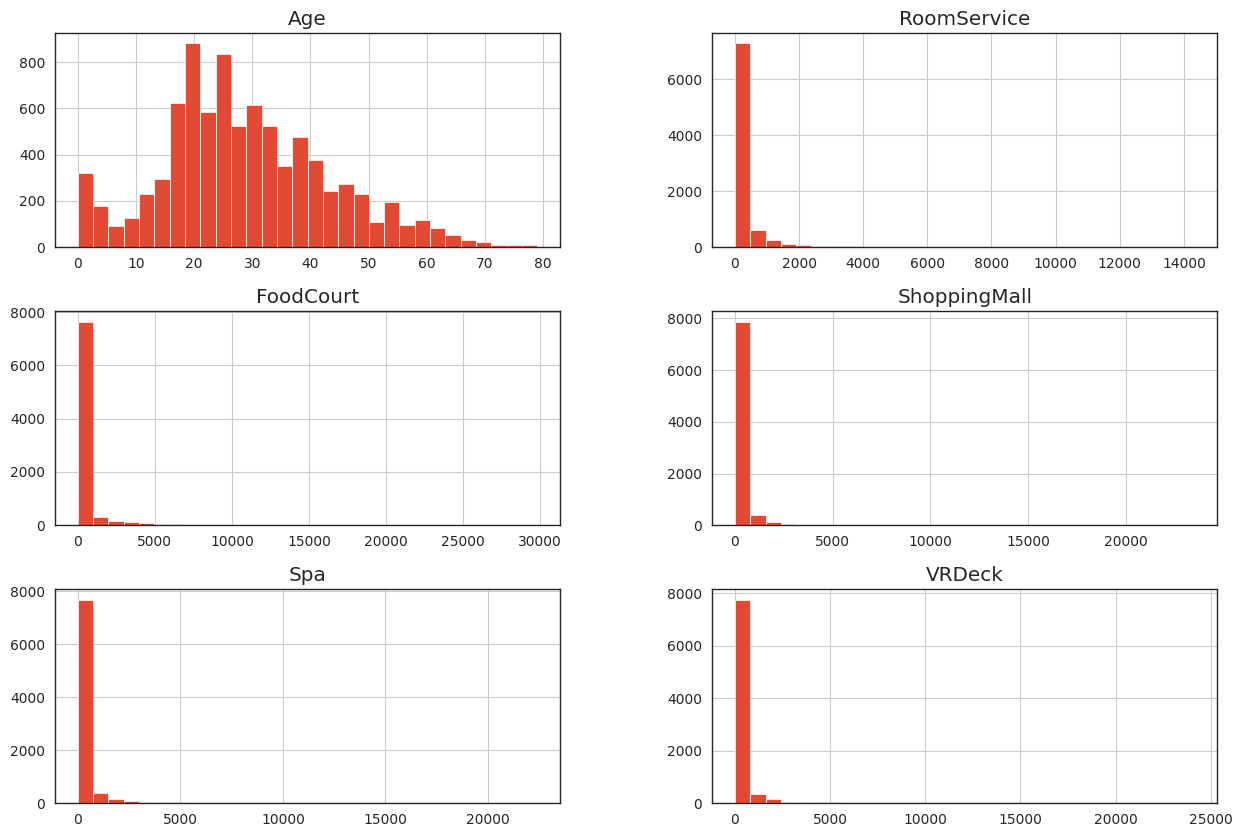

In [7]:

data1.hist(figsize=(15, 10),bins = 30)

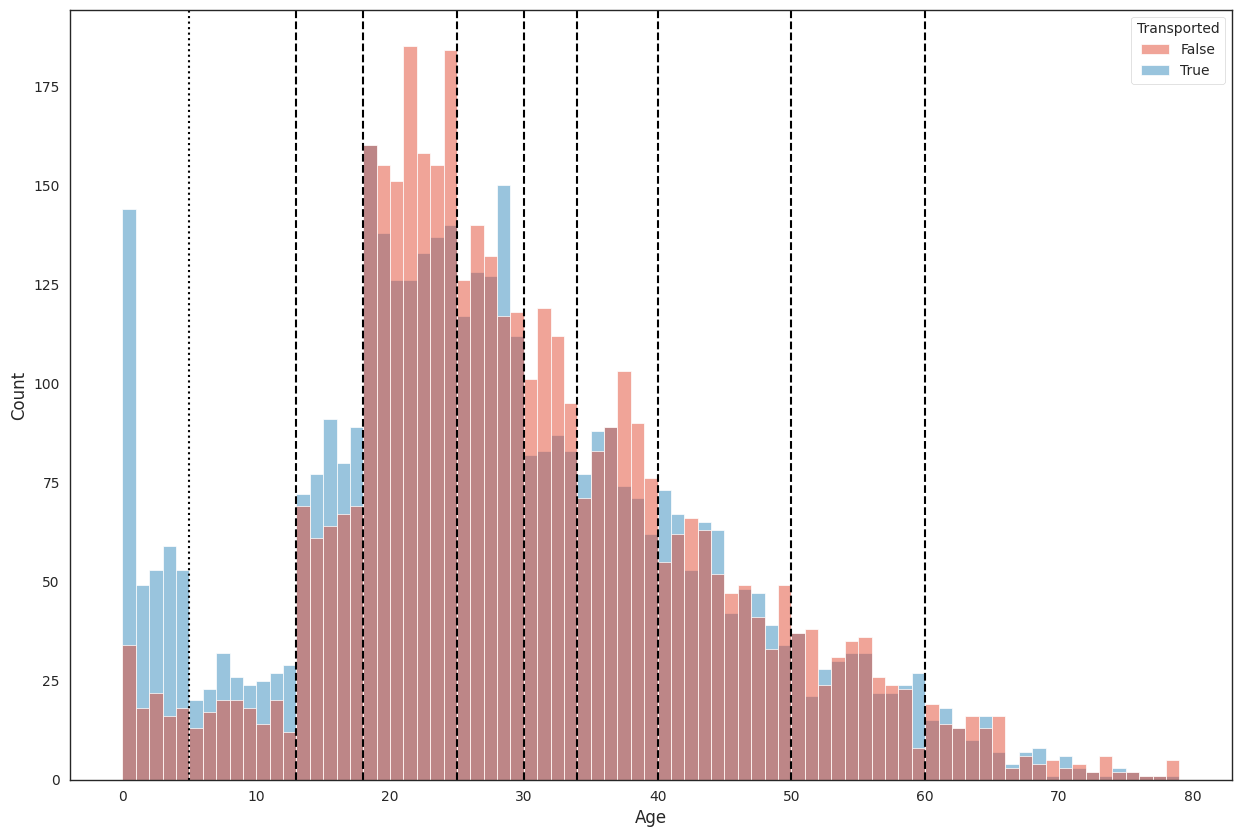

In [8]:
plt.figure(figsize=(15,10))
sns.histplot(data= data1, x='Age', hue = 'Transported',binwidth=1)
plt.axvline(x=5, color='black', linestyle=':')
plt.axvline(x=13, color='black', linestyle='--')
plt.axvline(x=18, color='black', linestyle='--')
plt.axvline(x=25, color='black', linestyle='--')
plt.axvline(x=30, color='black', linestyle='--')
plt.axvline(x=34, color='black', linestyle='--')
plt.axvline(x=40, color='black', linestyle='--')
plt.axvline(x=50, color='black', linestyle='--')
plt.axvline(x=60, color='black', linestyle='--')


In [9]:
for data in data_cleaner:
    data['Age_group'] = np.nan
    data.loc[data['Age'] <= 12, 'Age_group'] = 'Age_0_12'
    data.loc[(data['Age'] > 12) & (data['Age'] <= 17), 'Age_group'] = 'Age_13_17'
    data.loc[(data['Age'] > 17) & (data['Age'] <= 24), 'Age_group'] = 'Age_18_24'
    data.loc[(data['Age'] > 24) & (data['Age'] <= 29), 'Age_group'] = 'Age_25_29'
    data.loc[(data['Age'] > 29) & (data['Age'] <= 33), 'Age_group'] = 'Age_30_33'
    data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age_group'] = 'Age_34_40'
    data.loc[(data['Age'] > 40) & (data['Age'] <= 50) , 'Age_group'] = 'Age_41_50'
    data.loc[(data['Age'] > 50),'Age_group'] = 'Age_50+'



Text(0.5, 1.0, 'Age group vs Transported')

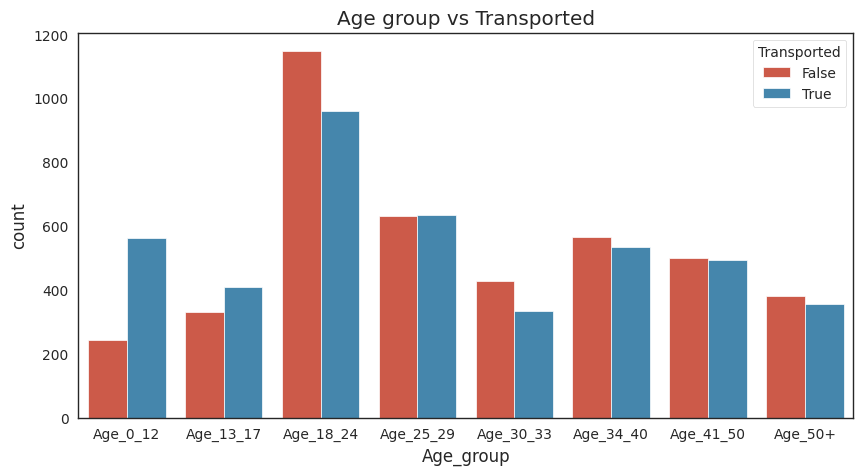

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=data1, x='Age_group', hue='Transported', order=['Age_0_12', 'Age_13_17', 'Age_18_24', 'Age_25_29', 'Age_30_33', 'Age_34_40', 'Age_41_50', 'Age_50+'], orient='v')
plt.title('Age group vs Transported')

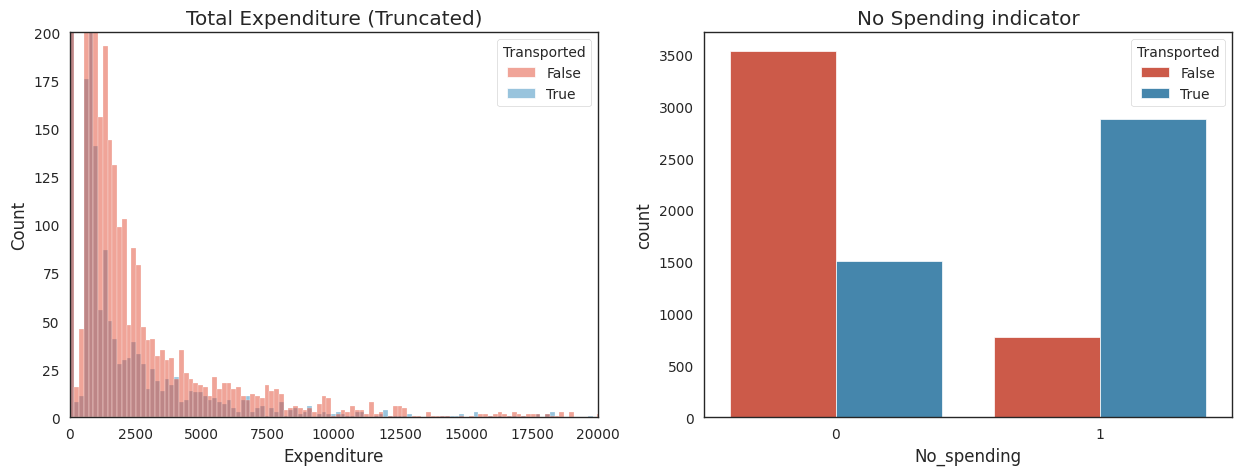

In [11]:
InteractiveShell.ast_node_interactivity = 'last'
for data in data_cleaner:
    data['Expenditure'] = data[exp_feats].sum(axis = 1)
    data['No_spending'] = (data['Expenditure'] == 0).astype(int)

fig, (hist,bar) = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data = data1, x= 'Expenditure', hue='Transported', bins=200, ax=hist)
hist.set_xlabel('Expenditure');
hist.set_title('Total Expenditure (Truncated)');
hist.set_ylim([0, 200]);
hist.set_xlim([0, 20000]);
sns.countplot(data = data1, x= 'No_spending', hue='Transported', ax=bar)
bar.set_title('No Spending indicator');
plt.show();

In [12]:
for data in data_cleaner:
    data['Group_number'] = data['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    data['Group_size'] = data['Group_number'].map(lambda x: data['Group_number'].value_counts()[x])


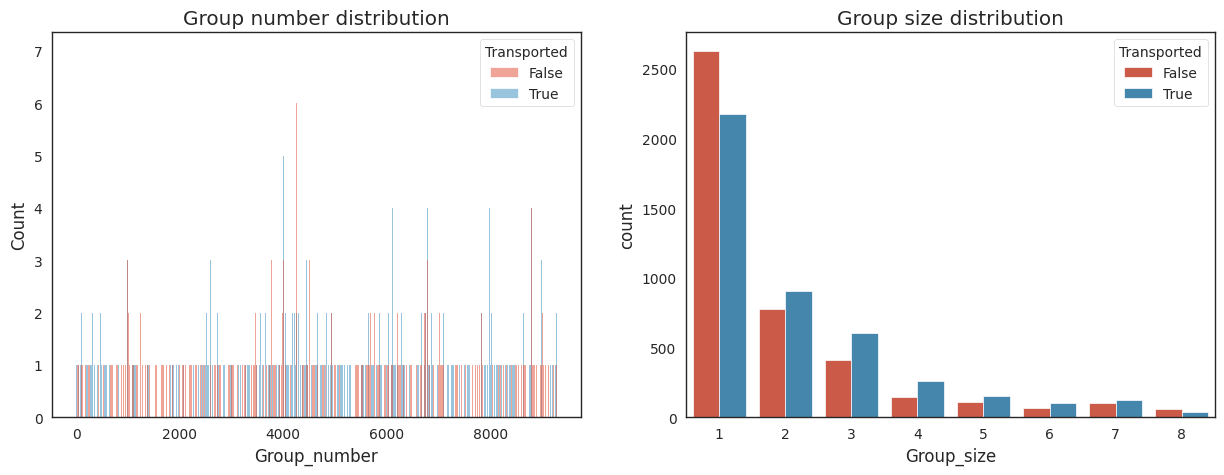

In [13]:
fig, (plt1,plt2) = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=data1, x='Group_number', hue='Transported', binwidth=1, ax=plt1)
plt1.set_title('Group number distribution')
sns.countplot(data=data1, x='Group_size', hue='Transported', ax=plt2)
plt2.set_title('Group size distribution')
plt.show()

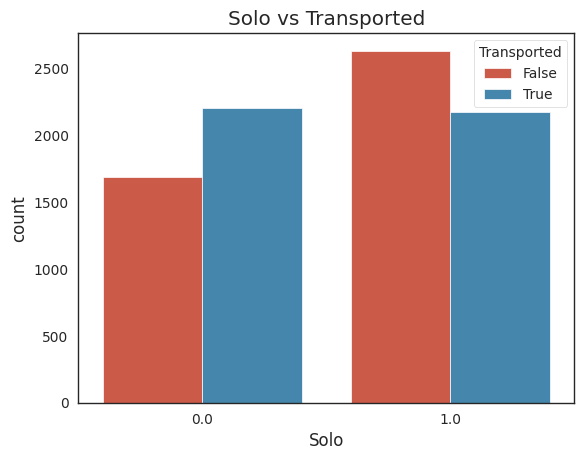

In [14]:
for data in data_cleaner:
    data.loc[data['Group_size'] == 1, 'Solo'] = 1
    data.loc[data['Group_size'] > 1, 'Solo'] = 0

sns.countplot(data = data1, x= 'Solo', hue='Transported');
plt.title('Solo vs Transported');
plt.show()

In [15]:
for data in data_cleaner:
    data['Cabin'].fillna('Z/9999/Z', inplace=True)
    data['Deck'] = data['Cabin'].apply(lambda x: x.split('/')[0])
    data['Room'] = data['Cabin'].apply(lambda x: x.split('/')[1])
    data['Side'] = data['Cabin'].apply(lambda x: x.split('/')[2])

    data.loc[data['Deck'] == 'Z', 'Deck'] = np.nan
    data.loc[data['Room'] == '9999', 'Room'] = np.nan
    data.loc[data['Side'] == 'Z', 'Side'] = np.nan
    data.drop('Cabin', axis=1, inplace=True)


In [16]:
target[0]

'Transported'

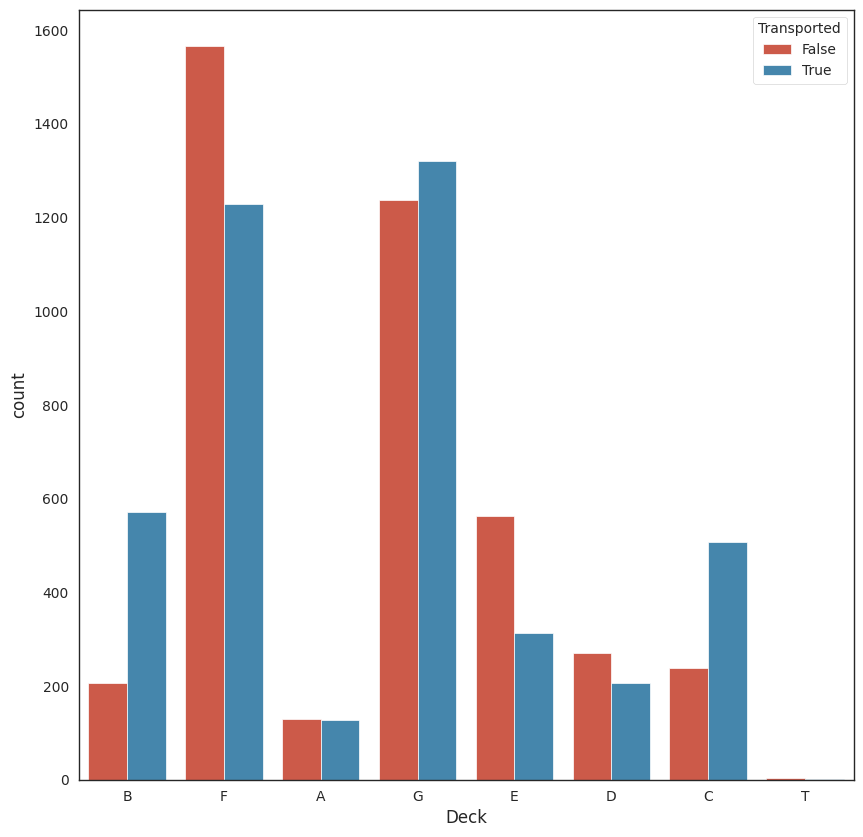

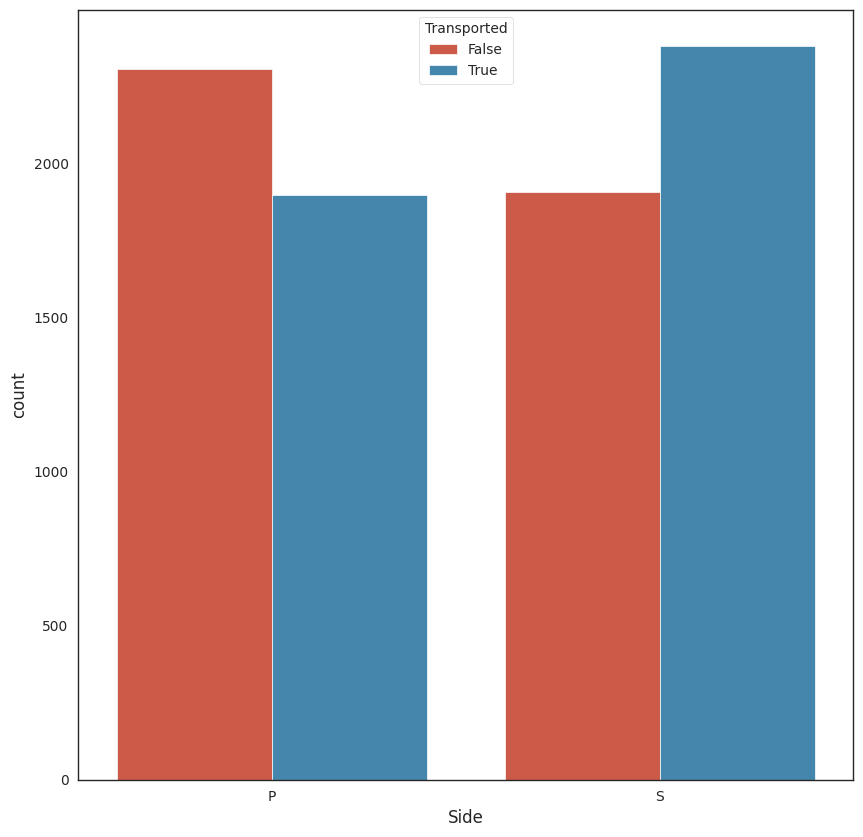

In [17]:
for col in ['Deck','Side']:
  plt.figure(figsize=(10,10))
  sns.countplot(data=data1, x = col , hue = 'Transported')

plt.show()

In [18]:
for data in data_cleaner:
  data['Room'] = data['Room'].astype('float64')

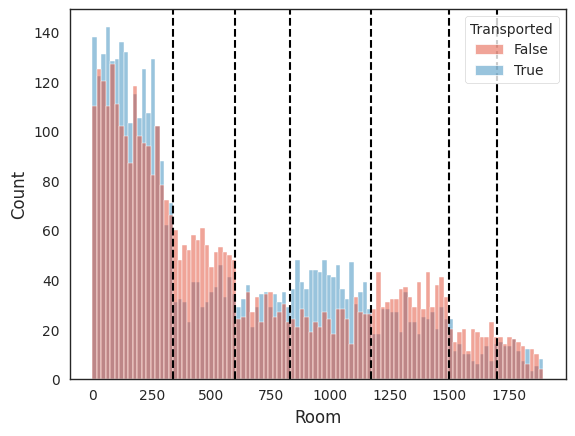

In [19]:
sns.histplot(data=data1, x = 'Room', hue = 'Transported', bins= 100)

plt.axvline(x=340, color='black', linestyle='--')
plt.axvline(x=600, color='black', linestyle='--')
plt.axvline(x=830, color='black', linestyle='--')
plt.axvline(x=1170, color='black', linestyle='--')
plt.axvline(x=1500, color='black', linestyle='--')
plt.axvline(x=1700, color='black', linestyle='--')

In [20]:
#One hot encoding for the rooms
for data in data_cleaner:
    data['Room'] = data['Room'].astype(float)
    data['Room_region1'] = (data['Room'] < 300).astype(int)
    data['Room_region2'] = ((data['Room'] >= 300) & (data['Room'] < 600)).astype(int)
    data['Room_region3'] = ((data['Room'] >= 600) & (data['Room'] < 830)).astype(int)
    data['Room_region4'] = ((data['Room'] >= 830) & (data['Room'] < 1170)).astype(int)
    data['Room_region5'] = ((data['Room'] >= 1170) & (data['Room'] < 1500)).astype(int)
    data['Room_region6'] = ((data['Room'] >= 1500) & (data['Room'] < 1700)).astype(int)
    data['Room_region7'] = (data['Room'] >= 1700).astype(int)
    # Create column with regions for each row to allow plotting
    data['Room_region'] = data['Room'].apply(lambda x: 1 if x < 300 else 2 if x < 600 else 3 if x < 830 else 4 if x < 1170 else 5 if x < 1500 else 6 if x < 1700 else 7)


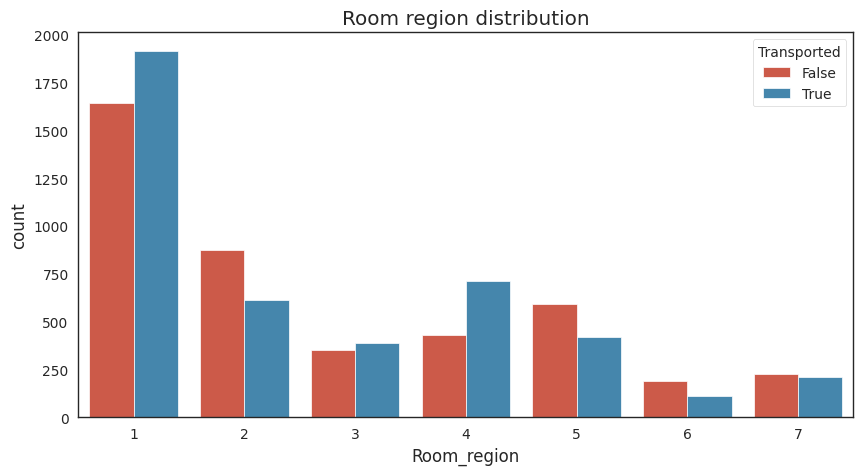

In [21]:
fig= plt.figure(figsize=(10,5))
fig = sns.countplot(data = data1, x= 'Room_region', hue='Transported', order = [1,2,3,4,5,6,7])
fig.set_title('Room region distribution');
plt.show()

In [22]:
for data in data_cleaner:
    data['Name'].fillna('Unknown Unknown', inplace=True)
    data['Surname'] = data['Name'].apply(lambda x: x.split(' ')[-1])
    data['Family_Size'] = data['Surname'].map(lambda x: data['Surname'].value_counts()[x])
    data['Surname'] = data['Surname'].replace('Unknown', np.nan);
    data['Family_Size'].loc[data['Surname'].isnull()] = 0




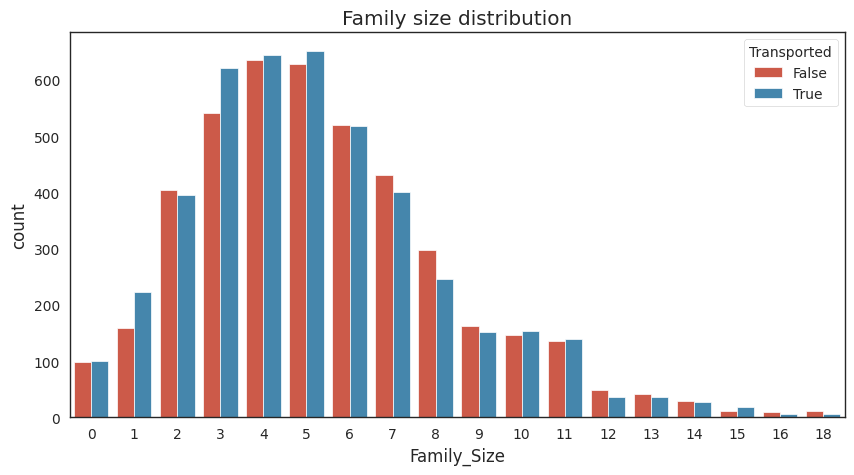

In [23]:
plt.figure(figsize=(10,5));
sns.countplot(data = data1, x= 'Family_Size', hue='Transported');
plt.title('Family size distribution');
plt.show()

In [24]:
#MISSING VALUES
print('Missing values in train and test set')
for data in data_cleaner:
    nan_cols = data.columns[data.isnull().any()].tolist()
    missing = pd.DataFrame(data[nan_cols].isnull().sum(), columns=['Number of missing'])
    missing['Percentage'] = missing/len(data)*100
    print(missing)


Missing values in train and test set
              Number of missing  Percentage
HomePlanet                  201    2.312205
CryoSleep                   217    2.496261
Destination                 182    2.093639
Age                         179    2.059128
VIP                         203    2.335212
RoomService                 181    2.082135
FoodCourt                   183    2.105142
ShoppingMall                208    2.392730
Spa                         183    2.105142
VRDeck                      188    2.162660
Age_group                   179    2.059128
Deck                        199    2.289198
Room                        199    2.289198
Side                        199    2.289198
Surname                     200    2.300702
              Number of missing  Percentage
HomePlanet                   87    2.034136
CryoSleep                    93    2.174421
Destination                  92    2.151040
Age                          91    2.127660
VIP                          93    2.17

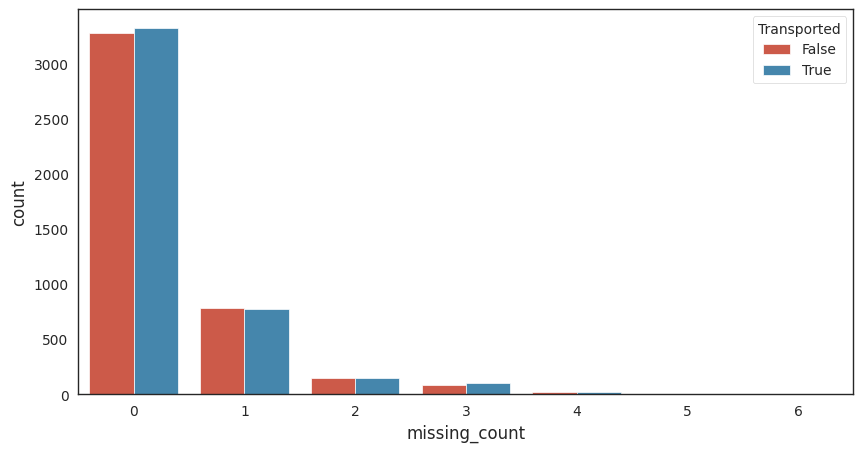

In [25]:
#calculate how many missing values are in the row
data1['missing_count'] = data1.isnull().sum(axis=1)
plt.figure(figsize=(10,5));
sns.countplot(data = data1, x= 'missing_count', hue='Transported');
plt.show()
data1.drop('missing_count', axis=1, inplace=True)

In [26]:
def homogeneity_in_group(data,group,test_value):

  if group == 'Surname':
    grouped = data.loc[data['Family_Size'] > 1].groupby([group,test_value]).size().unstack(fill_value=0)
    print('Groups of size one are excuded from the analysis because of automatic 100% score')
  elif group == 'Group_number':
    grouped = data.loc[data['Group_size'] > 1].groupby([group,test_value]).size().unstack(fill_value=0)
    print('Groups of size one are excuded from the analysis because of automatic 100% score')
  else:
    grouped = data.groupby([group,test_value]).size().unstack(fill_value=0)
    print('Analysis is not accurate with group size of one which cause overestiamtion of coherense')

  sum_by_row = grouped.sum(axis=1)
  max_by_row = grouped.max(axis=1)
  is_coherent_inGroup = (sum_by_row == max_by_row)
  print('---')
  print(f'{test_value} is coherent in the {group} in {round(is_coherent_inGroup.sum()/len(is_coherent_inGroup)*100,2)}% ')
  print(f'Avrage size of the biggest {test_value}  in the {group}: {round((max_by_row/sum_by_row).mean()*100,2)} % ')
  print('***************************************')

homogeneity_in_group(data1,'Group_number','Surname')
homogeneity_in_group(data1,'Surname','HomePlanet')
homogeneity_in_group(data1,'Group_number','HomePlanet')
homogeneity_in_group(data1,'Group_number', 'VIP')
homogeneity_in_group(data1,'Surname','VIP')
print('\n\n-----------------------------')
homogeneity_in_group(data1,'Surname', 'Destination')
homogeneity_in_group(data1,'Surname', 'Age_group')
homogeneity_in_group(data1,'Surname','Room_region')
homogeneity_in_group(data1,'Surname', 'Deck')
homogeneity_in_group(data1,'Surname','CryoSleep')
homogeneity_in_group(data1,'Surname','Transported')


Groups of size one are excuded from the analysis because of automatic 100% score
---
Surname is coherent in the Group_number in 82.37% 
Avrage size of the biggest Surname  in the Group_number: 93.53 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
HomePlanet is coherent in the Surname in 100.0% 
Avrage size of the biggest HomePlanet  in the Surname: 100.0 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
HomePlanet is coherent in the Group_number in 100.0% 
Avrage size of the biggest HomePlanet  in the Group_number: 100.0 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
VIP is coherent in the Group_number in 92.56% 
Avrage size of the biggest VIP  in the Group_number: 97.02 % 
***************************************
Groups of size one are excuded from th

# **HOMEPLANET**

In [27]:
#Home planet is always the same
for data in data_cleaner:
    groupBy = data.groupby(['Group_number', 'HomePlanet']).size().unstack(fill_value=0)
    na_Before = data['HomePlanet'].isnull().sum()
    index = data[data['HomePlanet'].isna() & data['Group_number'].isin(groupBy.index)].index
    data.loc[index, 'HomePlanet'] = data.loc[index, 'Group_number'].map(lambda x: groupBy.idxmax(axis=1)[x])
    na_After = data['HomePlanet'].isnull().sum()
    print(f'HomePlanet missing values before: {na_Before}, after: {na_After}')


HomePlanet missing values before: 201, after: 111
HomePlanet missing values before: 87, after: 46


In [28]:
#Home planet is always the same
for data in data_cleaner:
    groupBy = data.groupby(['Surname', 'HomePlanet']).size().unstack(fill_value=0)
    na_Before = data['HomePlanet'].isnull().sum()
    index = data[data['HomePlanet'].isna() & data['Surname'].isin(groupBy.index)].index
    data.loc[index, 'HomePlanet'] = data.loc[index, 'Surname'].map(lambda x: groupBy.idxmax(axis=1)[x])
    na_After = data['HomePlanet'].isnull().sum()
    print(f'HomePlanet missing values before: {na_Before}, after: {na_After}')

HomePlanet missing values before: 111, after: 12
HomePlanet missing values before: 46, after: 16


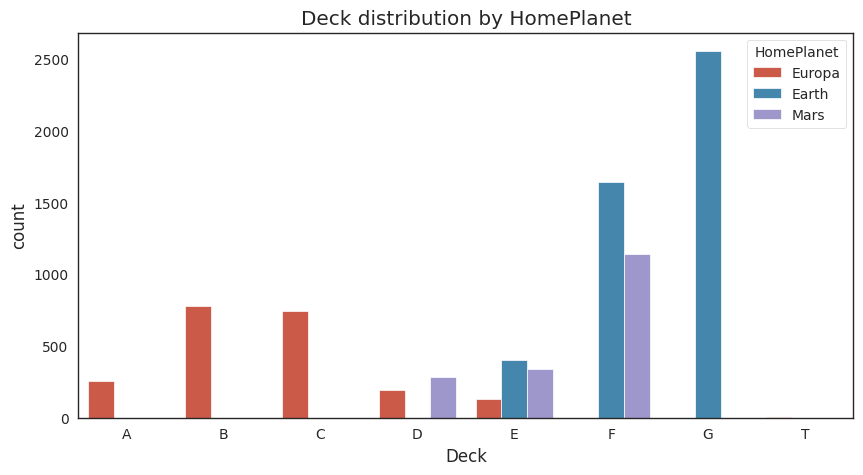

In [29]:

plt.figure(figsize=(10,5));
sns.countplot(data = data1, x= 'Deck', hue='HomePlanet', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']);
plt.title('Deck distribution by HomePlanet');
# deck A, B, C and T are from Europa, D is Europa/Mars, E is Mixed, F is Earth/Mars, G is Earth

In [30]:
for data in data_cleaner:
    na_Before = data['HomePlanet'].isnull().sum()
    data.loc[data['HomePlanet'].isna() & data['Deck'].isin(['A', 'B', 'C', 'T']), 'HomePlanet'] = 'Europa'
    data.loc[data['HomePlanet'].isna() & data['Deck'].isin(['G']), 'HomePlanet'] = 'Earth'
    na_After = data['HomePlanet'].isnull().sum()
    print(f'HomePlanet missing values before: {na_Before}, after: {na_After}')

HomePlanet missing values before: 12, after: 8
HomePlanet missing values before: 16, after: 11


In [31]:
# FILL HomePlanet with Earth if not od Deck D and with Mars if on deck D
for data in data_cleaner:
    HP_naBefore = data['HomePlanet'].isnull().sum()
    data.loc[data['HomePlanet'].isna() & data['Deck'].isin(['D']), 'HomePlanet'] = 'Mars'
    data.loc[data['HomePlanet'].isna() & ~data['Deck'].isin(['D']), 'HomePlanet'] = 'Earth'
    HP_naAfter = data['HomePlanet'].isnull().sum()
    print(f'HomePlanet missing values before: {HP_naBefore}, after: {HP_naAfter}')

HomePlanet missing values before: 8, after: 0
HomePlanet missing values before: 11, after: 0


# **SURNAME**

In [32]:
for data in data_cleaner:
  na_Before = data['Surname'].isnull().sum()
  grouped = data.groupby(['Group_number','Surname']).size().unstack(fill_value = 0)
  index = data[data['Surname'].isna() & data['Group_number'].isin(grouped.index)].index
  #index = data[data['HomePlanet'].isna() & data['Group_number'].isin(groupBy.index)].index
  data.loc[index,'Surname'] = data.loc[index,'Group_number'].map(lambda x: grouped.idxmax(axis=1)[x])
  na_After = data['Surname'].isnull().sum()
  print(f'Missing values before: {na_Before}, after: {na_After}')

Missing values before: 200, after: 104
Missing values before: 94, after: 51


In [33]:
for data in data_cleaner:
  data.loc[data['Surname'].isna(),'Surname'] = 'Un'
  data['Family_Size'] = data['Surname'].map(lambda x: data['Surname'].value_counts()[x])
  data.loc[data['Surname'] == 'Un','Family_Size'] = 0
  data.loc[data['Surname'] == 'Un','Surname'] = np.nan
  data.loc[data['Surname'] == np.nan,'Solo'] = 1



# **DESTINATION**

In [34]:
print(data1.columns)
print(data1.isnull().sum())

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Age_group', 'Expenditure', 'No_spending',
       'Group_number', 'Group_size', 'Solo', 'Deck', 'Room', 'Side',
       'Room_region1', 'Room_region2', 'Room_region3', 'Room_region4',
       'Room_region5', 'Room_region6', 'Room_region7', 'Room_region',
       'Surname', 'Family_Size'],
      dtype='object')
PassengerId       0
HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
Age_group       179
Expenditure       0
No_spending       0
Group_number      0
Group_size        0
Solo              0
Deck            199
Room            199
Side            199
Room_region1      0
Room_region2      0
Room_region3      0
Room_region4   

In [35]:
homogeneity_in_group(data1, 'Group_number','Destination')
homogeneity_in_group(data1, 'Surname','Destination')

Groups of size one are excuded from the analysis because of automatic 100% score
---
Destination is coherent in the Group_number in 49.22% 
Avrage size of the biggest Destination  in the Group_number: 78.49 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
Destination is coherent in the Surname in 33.46% 
Avrage size of the biggest Destination  in the Surname: 76.2 % 
***************************************


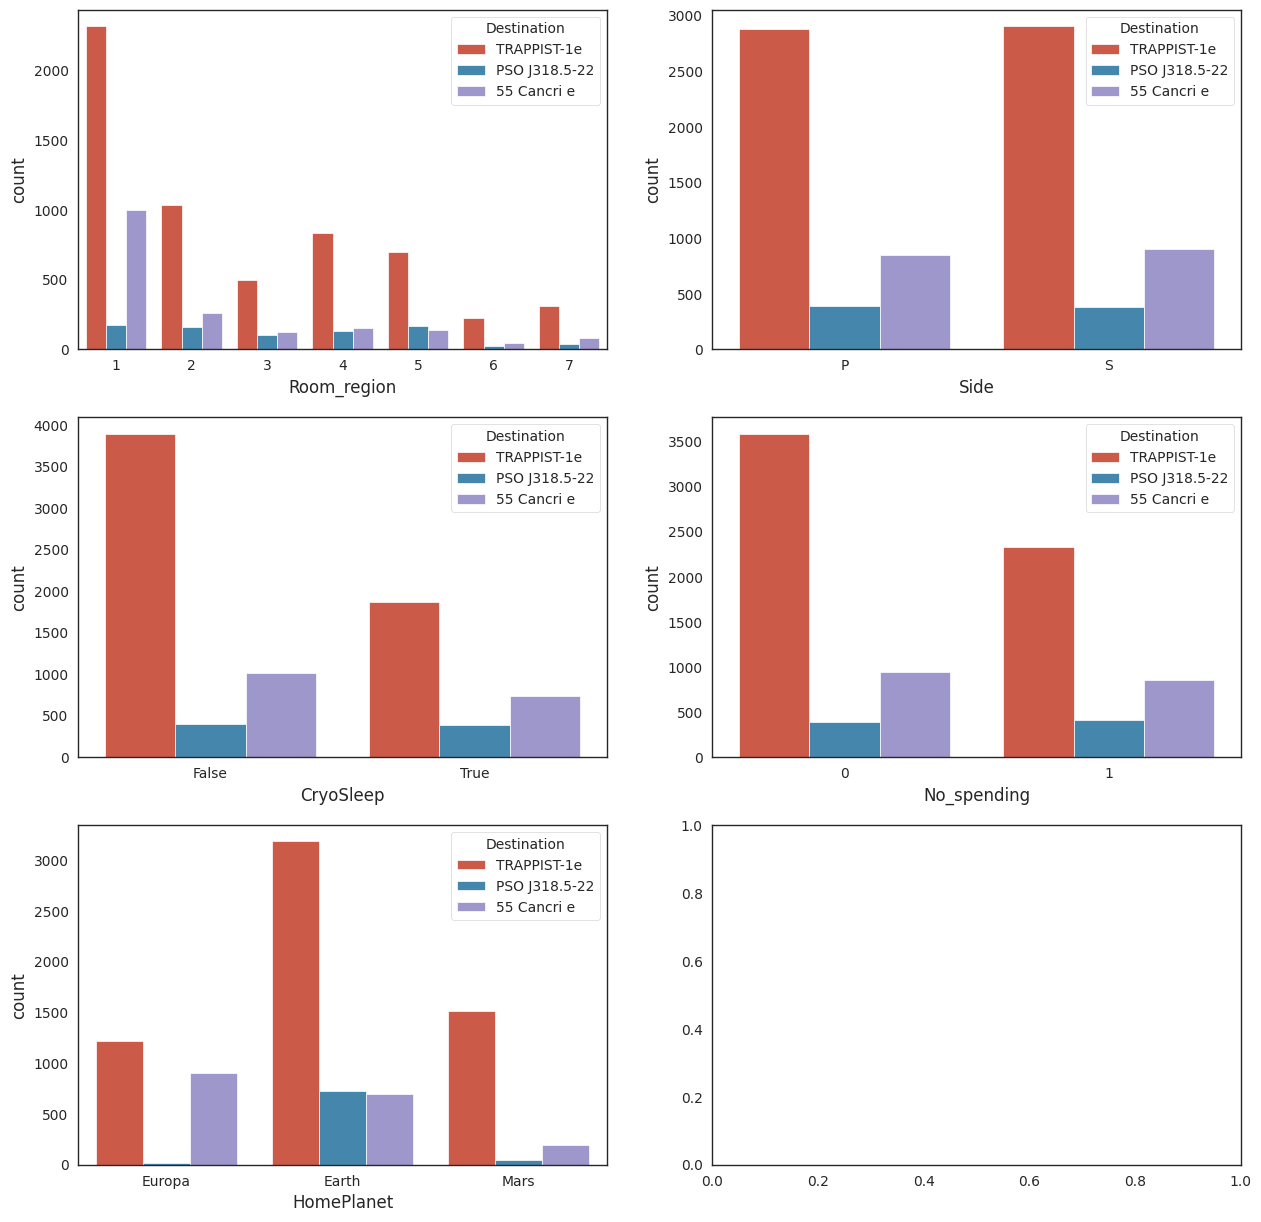

In [36]:
fig, axs = plt.subplots(3,2, figsize= (15,15))
sns.countplot(data = data1 , x ='Room_region',hue = 'Destination', ax = axs[0,0])
sns.countplot(data = data1 , x ='Side', hue = 'Destination', ax = axs[0,1])
sns.countplot(data = data1 , x ='CryoSleep',hue = 'Destination', ax = axs[1,0])
sns.countplot(data = data1 , x ='No_spending', hue = 'Destination', ax = axs[1,1])
sns.countplot(data=data1, x ='HomePlanet',hue = 'Destination', ax = axs[2,0])
plt.show()


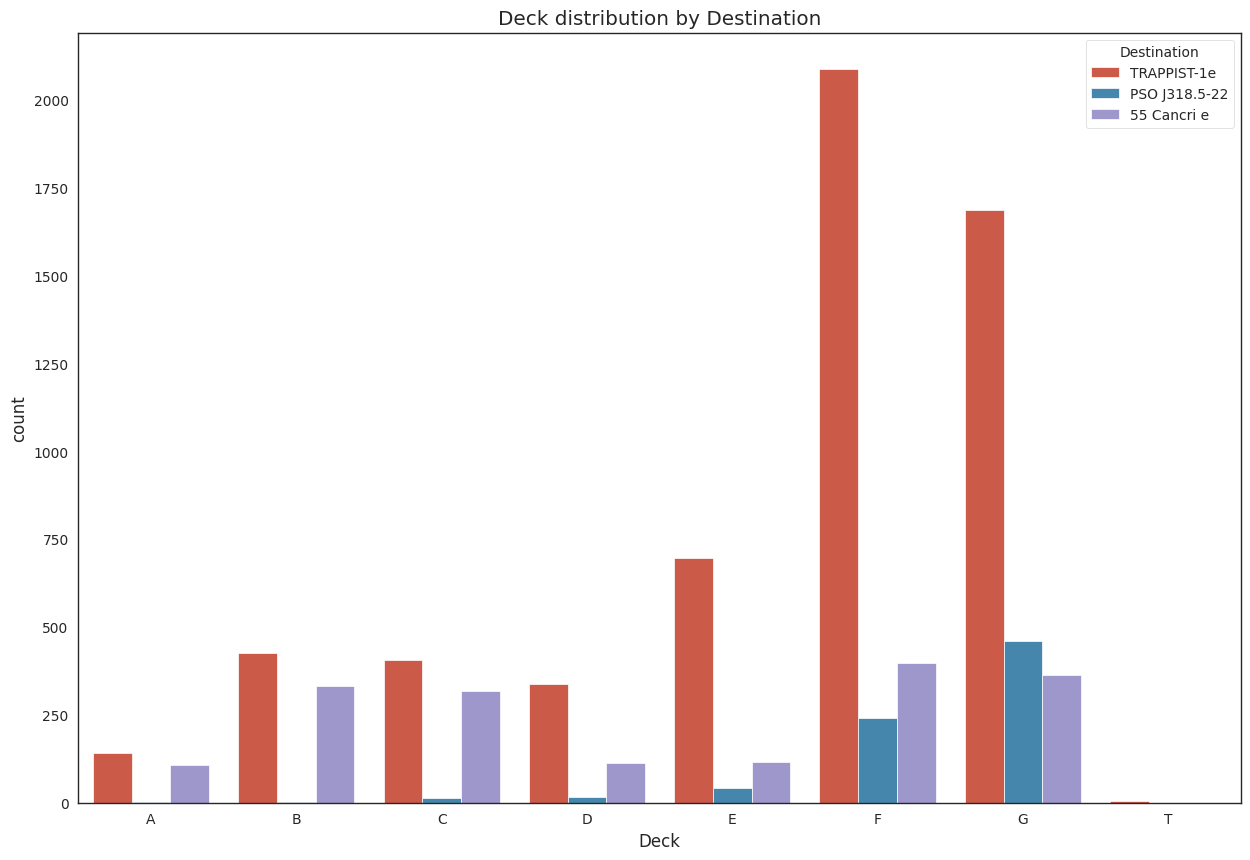

In [37]:
plt.figure(figsize=(15,10));
sns.countplot(data = data1, x= 'Deck', hue='Destination', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']);
plt.title('Deck distribution by Destination');

In [38]:

for data in data_cleaner:
    dest_naBefore = data['Destination'].isnull().sum()
    data1.loc[data1['Destination'].isna() & data1['Deck'].isin(['E','F','G','T']), 'Destination'] = 'TRAPPIST-1e'
    dest_naAfter = data['Destination'].isnull().sum()
    print(f'Destination missing values before: {dest_naBefore}, after: {dest_naAfter}')

Destination missing values before: 182, after: 47
Destination missing values before: 92, after: 92


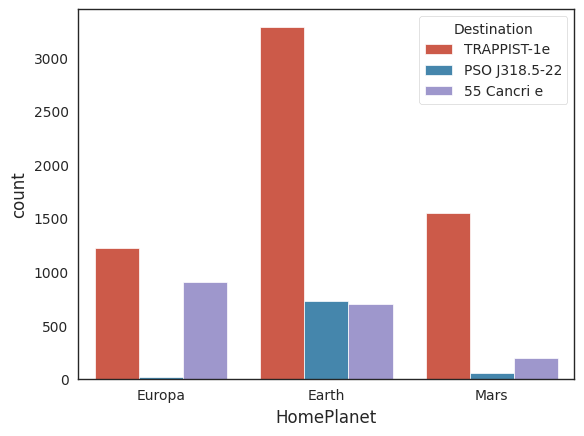

In [39]:
sns.countplot(data = data1, x= 'HomePlanet', hue='Destination');


In [40]:
for data in data_cleaner:
    dest_naBefore = data['Destination'].isna().sum()
    data1.loc[data1['Destination'].isna() & data1['HomePlanet'].isin(['Mars','Earth']), 'Destination'] = 'TRAPPIST-1e'
    dest_naAfter = data['Destination'].isna().sum()
    print(f'Destination missing values before: {dest_naBefore}, after: {dest_naAfter}')

Destination missing values before: 47, after: 34
Destination missing values before: 92, after: 92


In [41]:
for data in data_cleaner:
    dest_naBefore = data['Destination'].isna().sum()
    data.loc[data['Destination'].isna(),'Destination'] = 'TRAPPIST-1e'
    dest_naAfter = data['Destination'].isna().sum()
    print(f'Destination missing values before: {dest_naBefore}, after: {dest_naAfter}')


Destination missing values before: 34, after: 0
Destination missing values before: 92, after: 0


# **VIP**

In [42]:
homogeneity_in_group(data1, 'Surname','VIP')
homogeneity_in_group(data1, 'Group_number','VIP')

homogeneity_in_group(data1, 'Group_number','CryoSleep')
homogeneity_in_group(data1, 'Surname','CryoSleep')



Groups of size one are excuded from the analysis because of automatic 100% score
---
VIP is coherent in the Surname in 90.81% 
Avrage size of the biggest VIP  in the Surname: 97.4 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
VIP is coherent in the Group_number in 92.56% 
Avrage size of the biggest VIP  in the Group_number: 97.02 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
CryoSleep is coherent in the Group_number in 42.52% 
Avrage size of the biggest CryoSleep  in the Group_number: 76.44 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
CryoSleep is coherent in the Surname in 26.28% 
Avrage size of the biggest CryoSleep  in the Surname: 73.97 % 
***************************************


(0.0, 200.0)

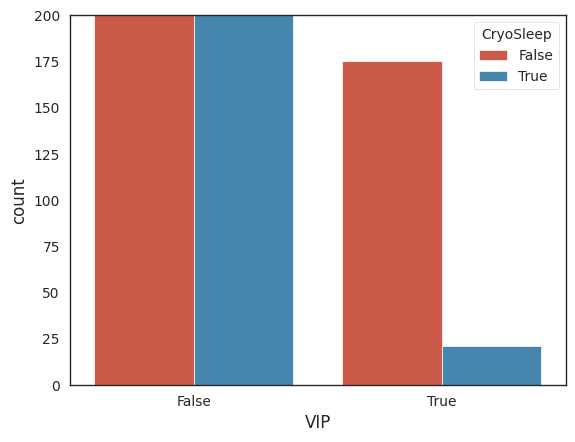

In [43]:
sns.countplot(data = data1, x= 'VIP', hue='CryoSleep' );
plt.ylim(0,200)

In [44]:
for data in data_cleaner:
  na_Before = data['VIP'].isnull().sum()
  grouped = data.groupby(['Group_number','VIP']).size().unstack(fill_value=0)
  index = data.loc[data['VIP'].isna() & data['Group_number'].isin(grouped.index)].index
  data.loc[index,'VIP'] =  (data.loc[index,'Group_number'].map(lambda x: grouped.idxmax(axis=1)[x]) == 'True').astype(int)
  na_After = data['VIP'].isnull().sum()
  print(f'Missing values before: {na_Before}, after: {na_After}')

Missing values before: 203, after: 116
Missing values before: 93, after: 56


In [45]:
for data in data_cleaner:
  na_Before = data['VIP'].isnull().sum()
  grouped = data.groupby(['Surname','VIP']).size().unstack(fill_value=0)
  index = data.loc[data['VIP'].isna() & data['Surname'].isin(grouped.index)].index
  data.loc[index,'VIP'] =  (data.loc[index,'Surname'].map(lambda x: grouped.idxmax(axis=1)[x]) == 'True').astype(int)
  na_After = data['VIP'].isnull().sum()
  print(f'Missing values before: {na_Before}, after: {na_After}')

Missing values before: 116, after: 7
Missing values before: 56, after: 18


(0.0, 75.0)

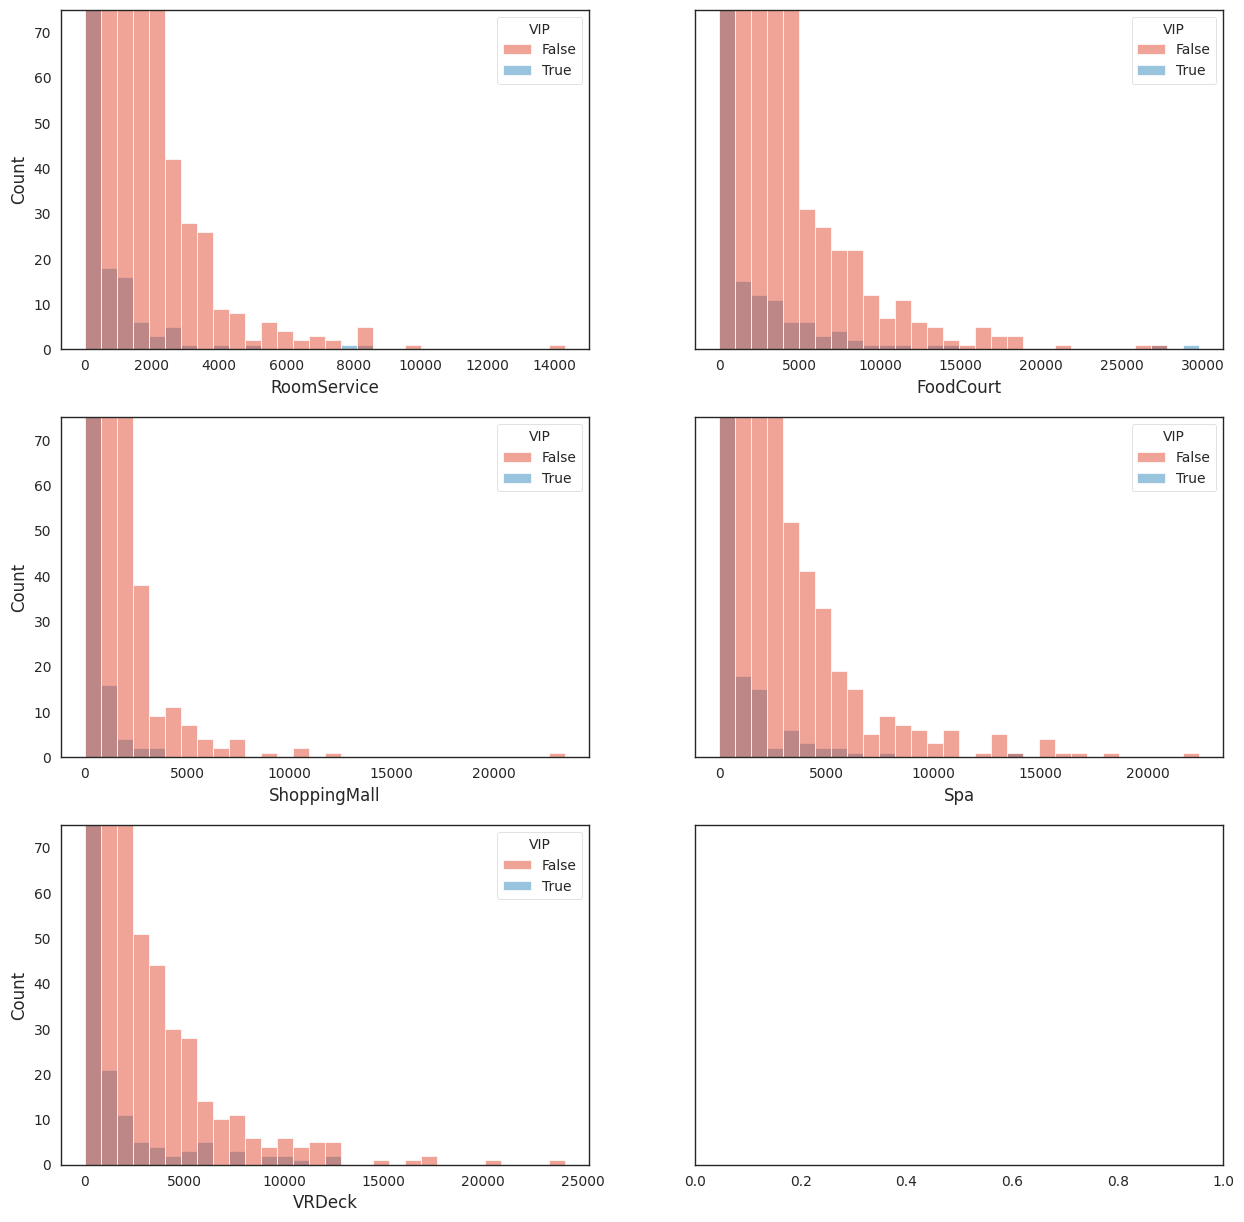

In [46]:
fig, ax = plt.subplots(3,2,figsize=(15,15),sharey=True)
sns.histplot(data=data1,x='RoomService',hue = 'VIP', bins = 30,ax = ax[0,0])

sns.histplot(data=data1,x='FoodCourt',hue = 'VIP', bins = 30,ax = ax[0,1])

sns.histplot(data=data1,x='ShoppingMall',hue = 'VIP', bins = 30,ax = ax[1,0])

sns.histplot(data=data1,x='Spa',hue = 'VIP', bins = 30,ax = ax[1,1])

sns.histplot(data=data1,x='VRDeck',hue = 'VIP', bins = 30,ax = ax[2,0])
plt.ylim(0,75)

<Axes: xlabel='CryoSleep', ylabel='count'>

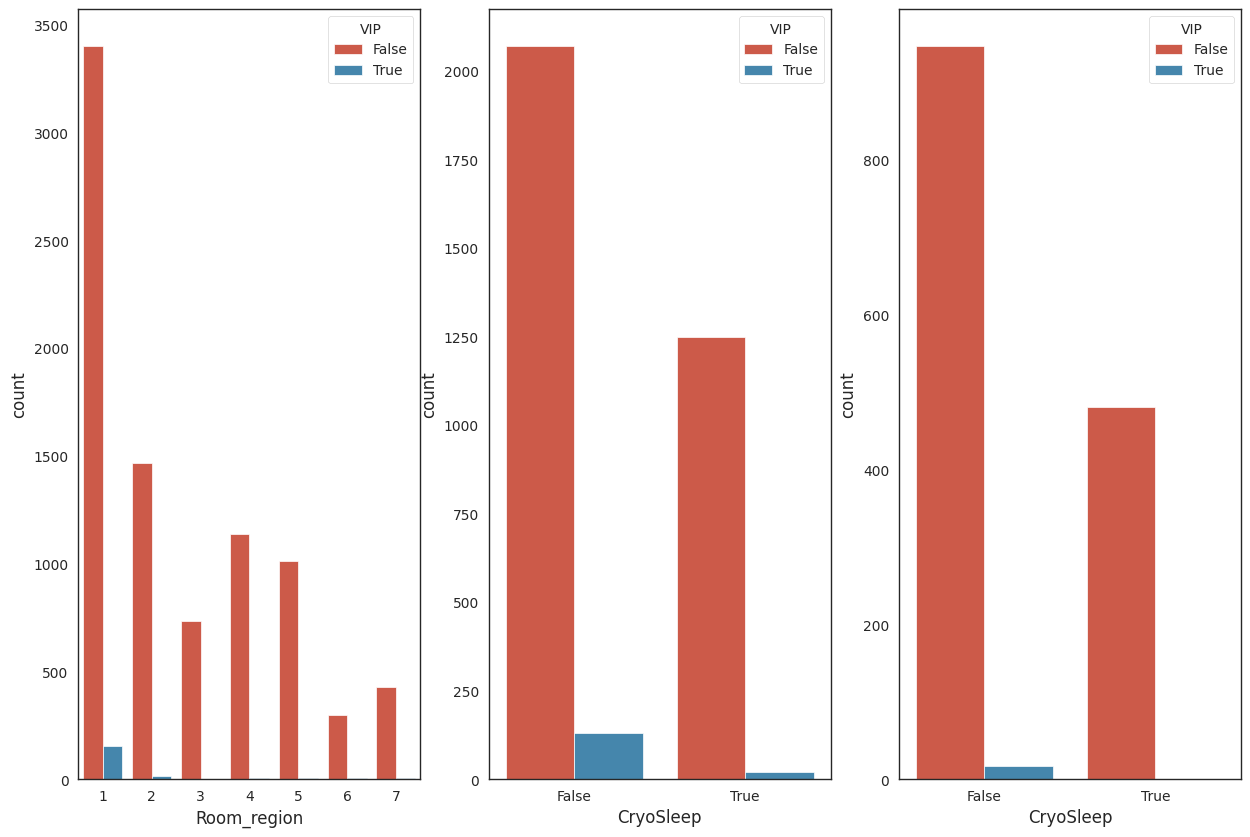

In [47]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
sns.countplot(data=data1,x='Room_region', hue="VIP", ax=ax[0])
region1 = data1.loc[data1['Room_region'] == 1]
sns.countplot(data=region1 ,x='CryoSleep', hue="VIP", ax=ax[1])
region2 = data1.loc[data1['Room_region'] == 2]
sns.countplot(data=region2 ,x='CryoSleep', hue="VIP", ax=ax[2])

In [48]:
for data in data_cleaner:
  na_Before = data['VIP'].isnull().sum()
  data.loc[data['VIP'].isnull() & (data['Room_region'] == 1) & (data['CryoSleep'] == 0) & (data['Solo'] == 1),'VIP'] = 1
  data.loc[data['VIP'].isnull() & (data['Room_region'] == 1) & (data['CryoSleep'] == 1) & (data['Solo'] == 1),'VIP'] = 0
  na_After = data['VIP'].isnull().sum()
  print(f'Destination missing values before: {na_Before}, after: {na_After}')

Destination missing values before: 7, after: 3
Destination missing values before: 18, after: 11


In [49]:
for data in data_cleaner:
  na_Before = data['VIP'].isnull().sum()
  data.loc[data['VIP'].isnull(),'VIP'] = 0
  na_After = data['VIP'].isnull().sum()
  print(f'Destination missing values before: {na_Before}, after: {na_After}')

Destination missing values before: 3, after: 0
Destination missing values before: 11, after: 0


# **CryoSleep**


In [50]:
data1.loc[data1['VIP'] == 1]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group,Expenditure,No_spending,Group_number,Group_size,Solo,Deck,Room,Side,Room_region1,Room_region2,Room_region3,Room_region4,Room_region5,Room_region6,Room_region7,Room_region,Surname,Family_Size
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Age_50+,10383.0,0,3,2,0.0,A,0.0,S,1,0,0,0,0,0,0,1,Susent,6
108,0112_01,Europa,False,55 Cancri e,48.0,True,0.0,2537.0,87.0,17.0,13.0,Moth Cowtale,True,Age_41_50,2654.0,0,112,1,1.0,B,1.0,S,1,0,0,0,0,0,0,1,Cowtale,2
120,0128_01,Mars,False,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,316.0,2.0,Grohs Fles,False,Age_50+,3014.0,0,128,2,0.0,D,3.0,S,1,0,0,0,0,0,0,1,Fles,2
214,0224_01,Mars,False,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,1634.0,0.0,Blues Queen,False,Age_30_33,1820.0,0,224,1,1.0,F,42.0,S,1,0,0,0,0,0,0,1,Queen,1
291,0321_01,Mars,False,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False,Age_50+,1227.0,0,321,1,1.0,F,61.0,S,1,0,0,0,0,0,0,1,Bache,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,9158_01,Europa,True,55 Cancri e,30.0,True,0.0,0.0,0.0,0.0,0.0,Magnon Maglible,True,Age_30_33,0.0,1,9158,1,1.0,B,298.0,P,1,0,0,0,0,0,0,1,Maglible,1
8614,9194_02,Europa,False,TRAPPIST-1e,32.0,True,1003.0,909.0,0.0,0.0,15.0,Tachba Subwor,False,Age_30_33,1927.0,0,9194,2,0.0,E,603.0,S,0,0,1,0,0,0,0,3,Subwor,3
8621,9197_02,Europa,False,TRAPPIST-1e,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False,Age_41_50,17041.0,0,9197,4,0.0,C,308.0,P,0,1,0,0,0,0,0,2,Platch,10
8652,9230_01,Europa,False,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,Unknown Unknown,True,Age_34_40,10154.0,0,9230,1,1.0,C,342.0,S,0,1,0,0,0,0,0,2,NaN,0


(0.0, 200.0)

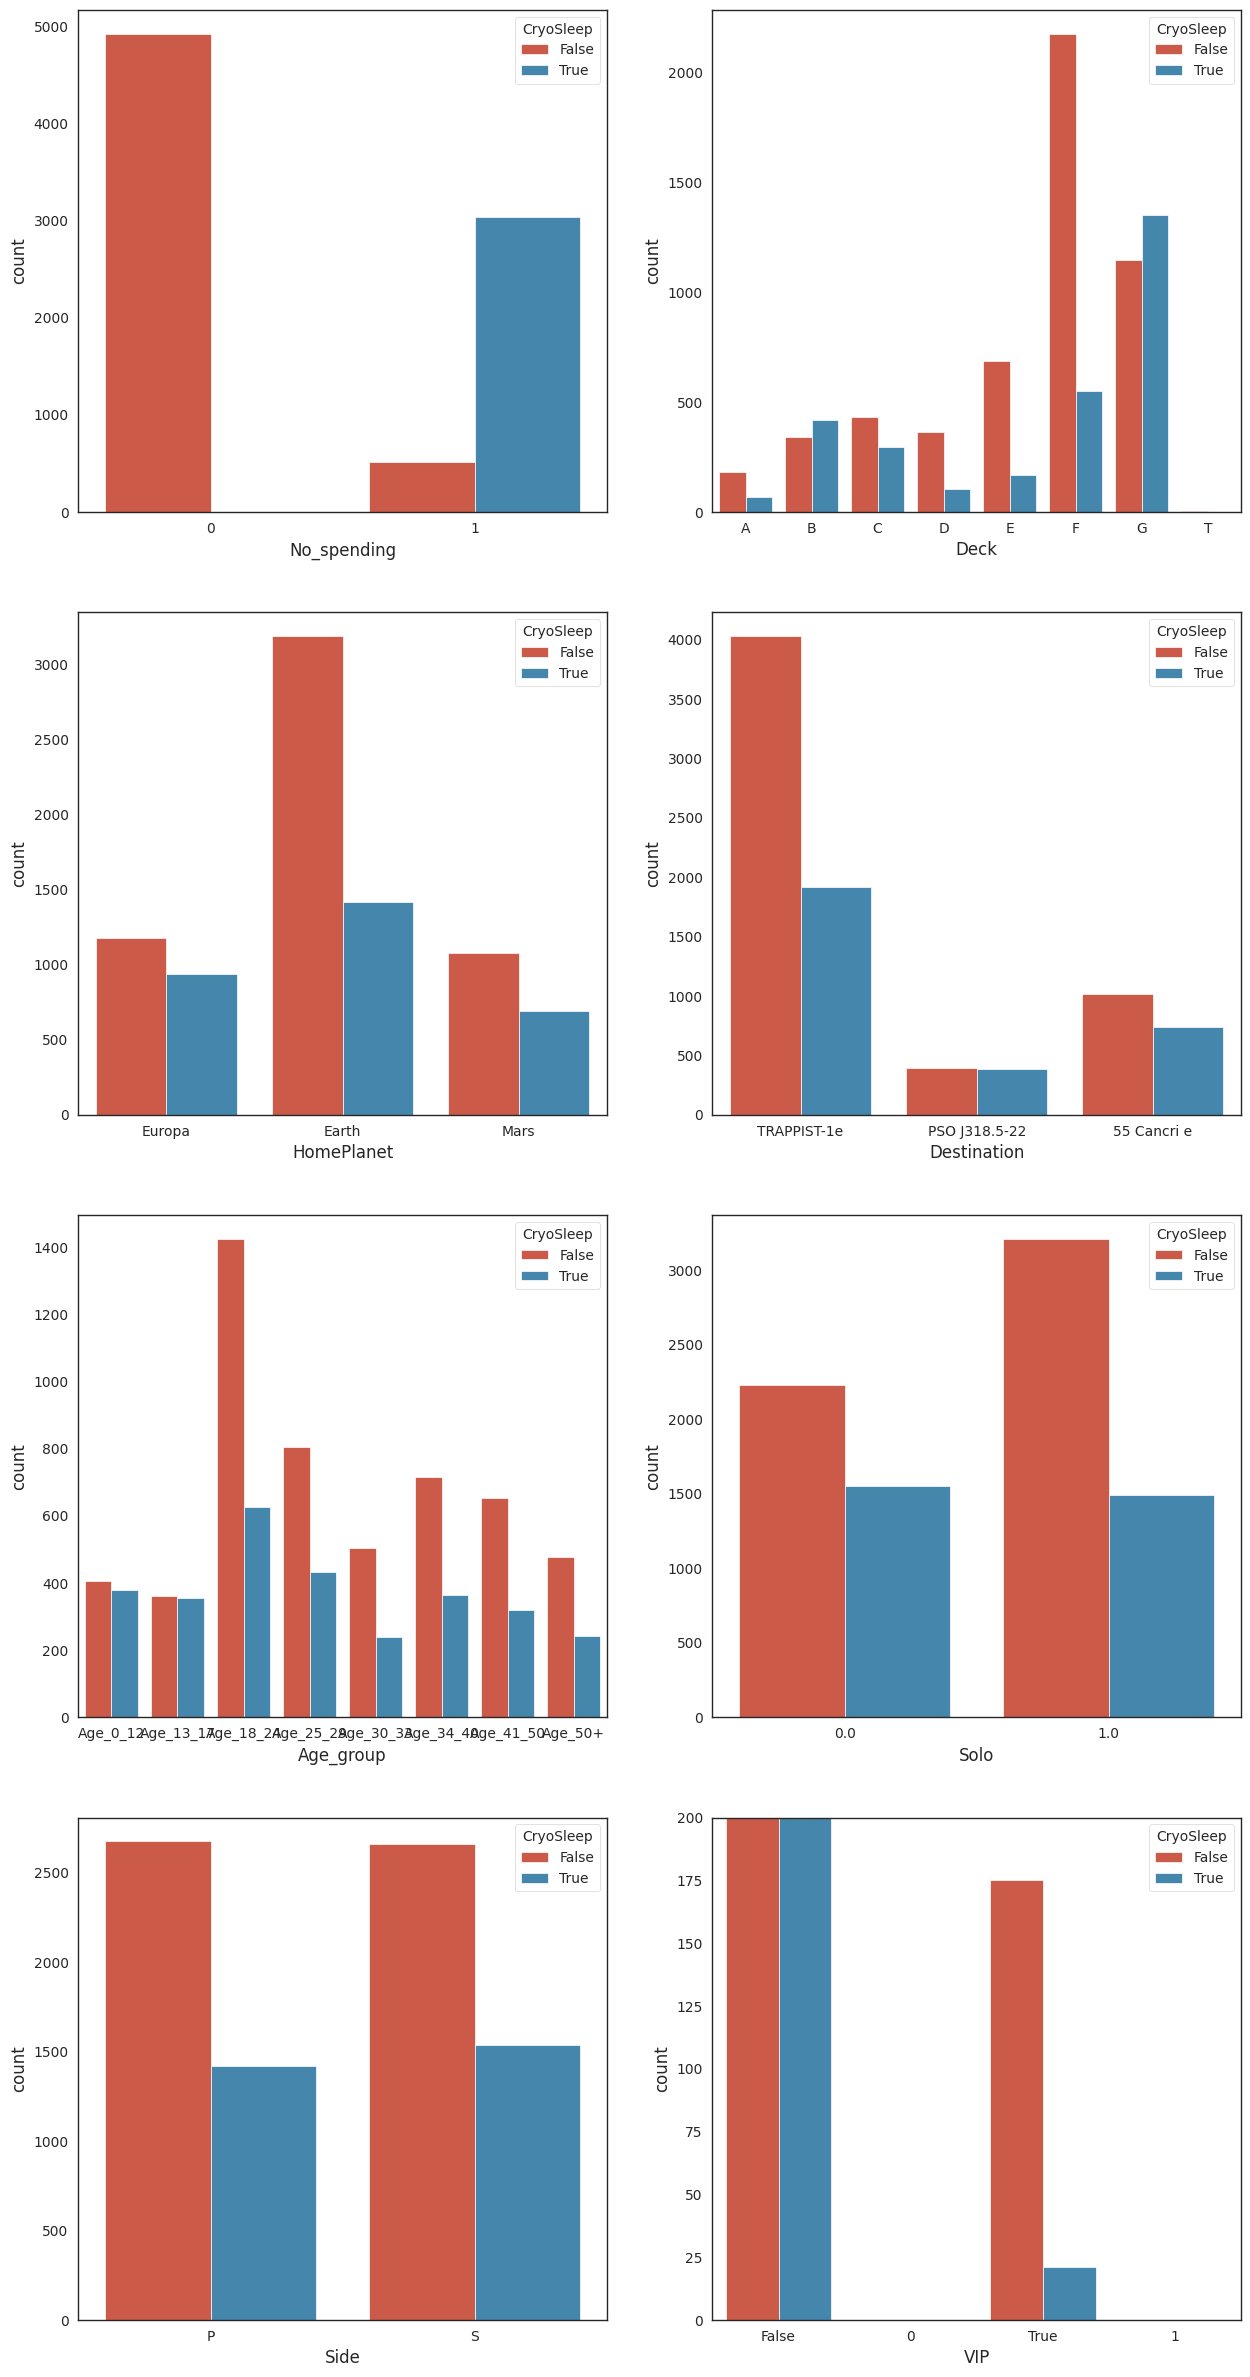

In [51]:

fig , ax = plt.subplots(4,2,figsize=(15,30));
sns.countplot(data = data1, x= 'No_spending', hue='CryoSleep' ,ax=ax[0,0]);
sns.countplot(data = data1, x= 'Deck', hue='CryoSleep' ,ax=ax[0,1],order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']);
sns.countplot(data = data1, x= 'HomePlanet', hue='CryoSleep' ,ax=ax[1,0]);
sns.countplot(data = data1, x= 'Destination', hue='CryoSleep' ,ax=ax[1,1]);
sns.countplot(data = data1, x= 'Age_group', hue='CryoSleep' ,ax=ax[2,0],  order=['Age_0_12', 'Age_13_17', 'Age_18_24', 'Age_25_29', 'Age_30_33', 'Age_34_40', 'Age_41_50','Age_50+'] );
sns.countplot(data = data1, x= 'Solo', hue='CryoSleep' ,ax=ax[2,1]);
sns.countplot(data = data1, x= 'Side', hue='CryoSleep' ,ax=ax[3,0]);
sns.countplot(data = data1, x= 'VIP', hue='CryoSleep' ,ax=ax[3,1]);
plt.ylim(0,200)

In [52]:
#FILL IN MISSING VALUES FOR CryoSleep
#Fill in missing values for CryoSleep with 1 if passenger has not spent any money and is on deck G,C,B
for data in data_cleaner:
    sleep_naBefore = data['CryoSleep'].isna().sum()
    data.loc[(data['CryoSleep'].isna()) & (data['No_spending'] == 1) & (data['Deck'].isin(['G','C','B'])) & (data['VIP'] == 0), 'CryoSleep'] = 1
    data.loc[data['CryoSleep'].isna() & (data['No_spending'] == 0), 'CryoSleep'] = 0
    sleep_naAfter = data['CryoSleep'].isna().sum()
    print(f'CryoSleep missing values before: {sleep_naBefore}, after: {sleep_naAfter}')

CryoSleep missing values before: 217, after: 34
CryoSleep missing values before: 93, after: 12


In [53]:
for data in data_cleaner:
    sleep_naBefore = data['CryoSleep'].isna().sum()
    data.loc[data['CryoSleep'].isna() & (data['VIP'] == 1) & (data['No_spending'] == 0),'CryoSleep'] = 0
    sleep_naAfter = data['CryoSleep'].isna().sum()
    print(f'CryoSleep missing values before: {sleep_naBefore}, after: {sleep_naAfter}')

CryoSleep missing values before: 34, after: 34
CryoSleep missing values before: 12, after: 12


<Axes: xlabel='Deck', ylabel='count'>

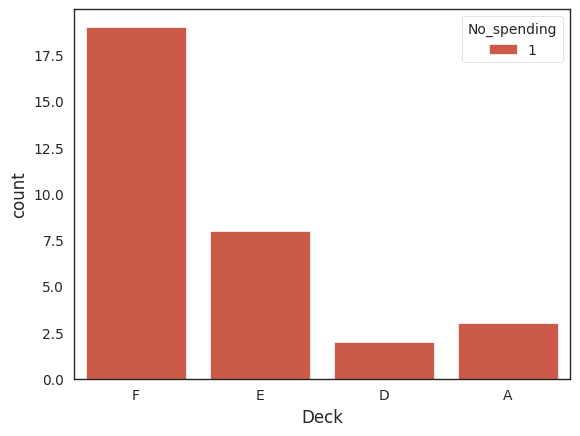

In [54]:
nansleep = data1.loc[data1['CryoSleep'].isnull()]
sns.countplot(nansleep,x='Deck', hue = 'No_spending')

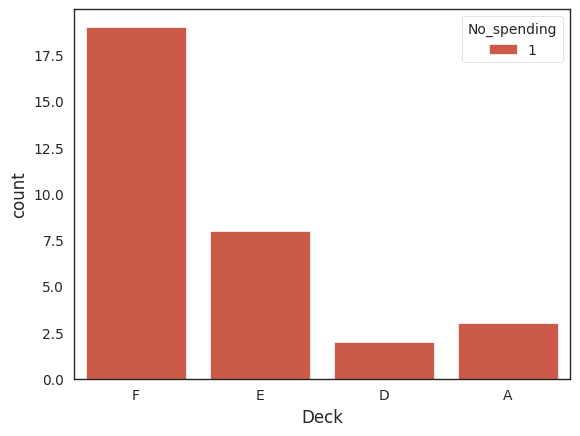

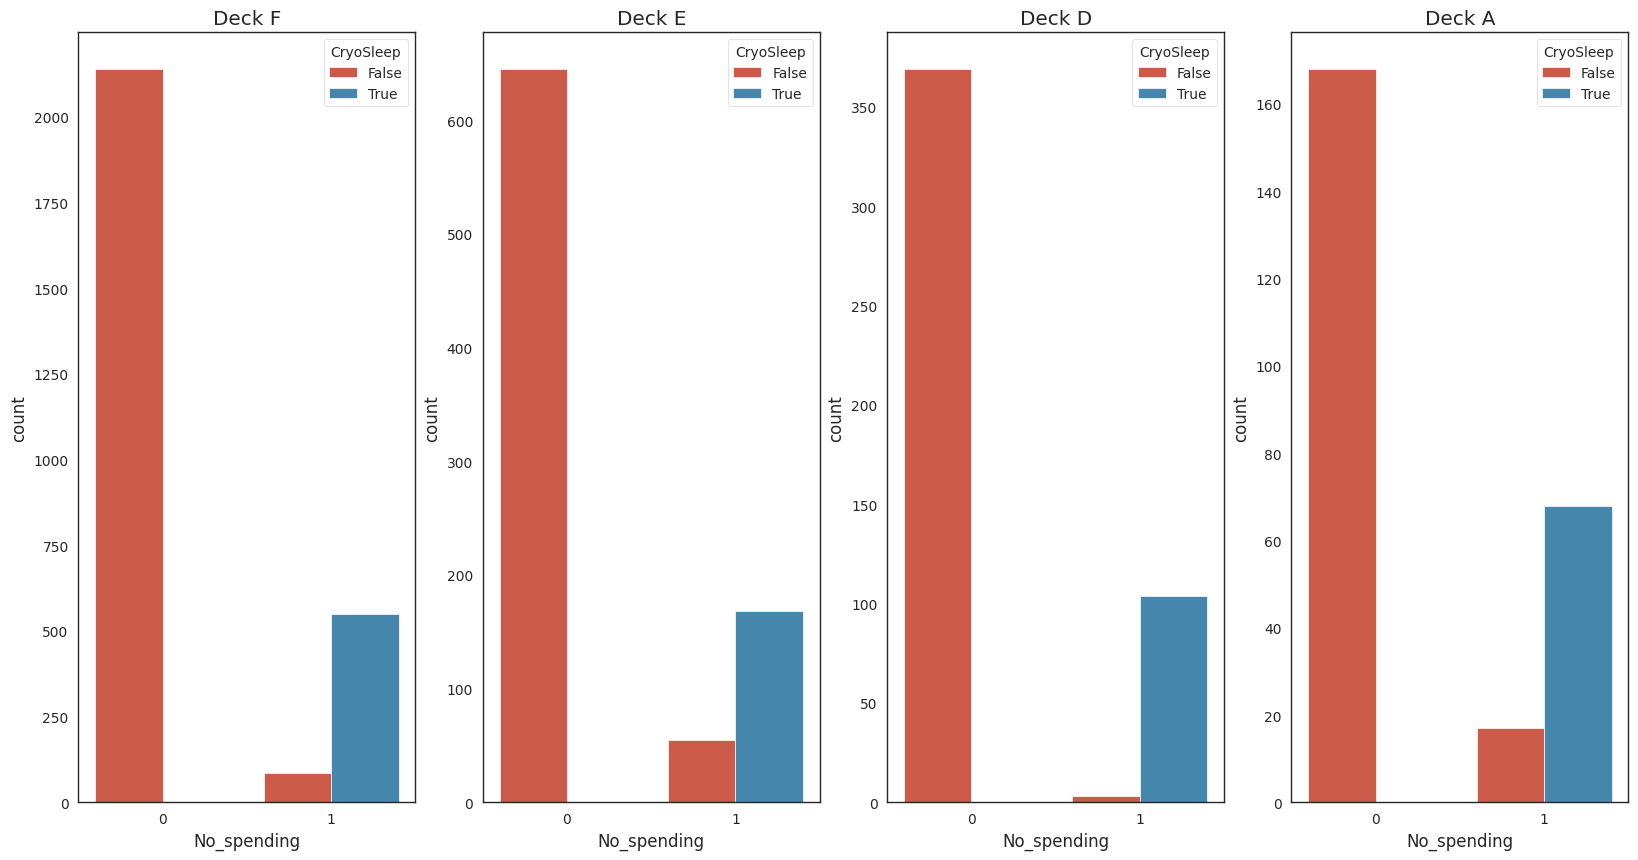

In [55]:
nansleep = data1.loc[data1['CryoSleep'].isnull()]
sns.countplot(nansleep,x='Deck', hue = 'No_spending')

fig, ax = plt.subplots(1,4, figsize=(20,10))
deckF = data1.loc[data1['Deck'] == 'F']
deckE= data1.loc[data1['Deck'] == 'E']
deckD= data1.loc[data1['Deck'] == 'D']
deckA= data1.loc[data1['Deck'] == 'A']
sns.countplot(deckF,x='No_spending', hue = 'CryoSleep', ax = ax[0])
ax[0].title.set_text('Deck F')
sns.countplot(deckE,x='No_spending', hue = 'CryoSleep', ax = ax[1])
ax[1].title.set_text('Deck E')
sns.countplot(deckD,x='No_spending', hue = 'CryoSleep', ax = ax[2])
ax[2].title.set_text('Deck D')
sns.countplot(deckA,x='No_spending', hue = 'CryoSleep', ax = ax[3])
ax[3].title.set_text('Deck A')


In [56]:
for data in data_cleaner:
    sleep_naBefore = data['CryoSleep'].isna().sum()
    data.loc[data['CryoSleep'].isna() & data['No_spending'] == 1 ,'CryoSleep'] = 1
    sleep_naAfter = data['CryoSleep'].isna().sum()
    print(f'CryoSleep missing values before: {sleep_naBefore}, after: {sleep_naAfter}')


CryoSleep missing values before: 34, after: 0
CryoSleep missing values before: 12, after: 0


AGE (I do not see any chanse for analytical imputation of AGE of the passanger without modeling it throw all other parrametters)

In [57]:
data1.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group,Expenditure,No_spending,Group_number,Group_size,Solo,Deck,Room,Side,Room_region1,Room_region2,Room_region3,Room_region4,Room_region5,Room_region6,Room_region7,Room_region,Surname,Family_Size
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Age_34_40,0.0,1,1,1,1.0,B,0.0,P,1,0,0,0,0,0,0,1,Ofracculy,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Age_18_24,736.0,0,2,1,1.0,F,0.0,S,1,0,0,0,0,0,0,1,Vines,4
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Age_50+,10383.0,0,3,2,0.0,A,0.0,S,1,0,0,0,0,0,0,1,Susent,6
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Age_30_33,5176.0,0,3,2,0.0,A,0.0,S,1,0,0,0,0,0,0,1,Susent,6
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Age_13_17,1091.0,0,4,1,1.0,F,1.0,S,1,0,0,0,0,0,0,1,Santantines,6


<Axes: xlabel='Family_Size', ylabel='Age'>

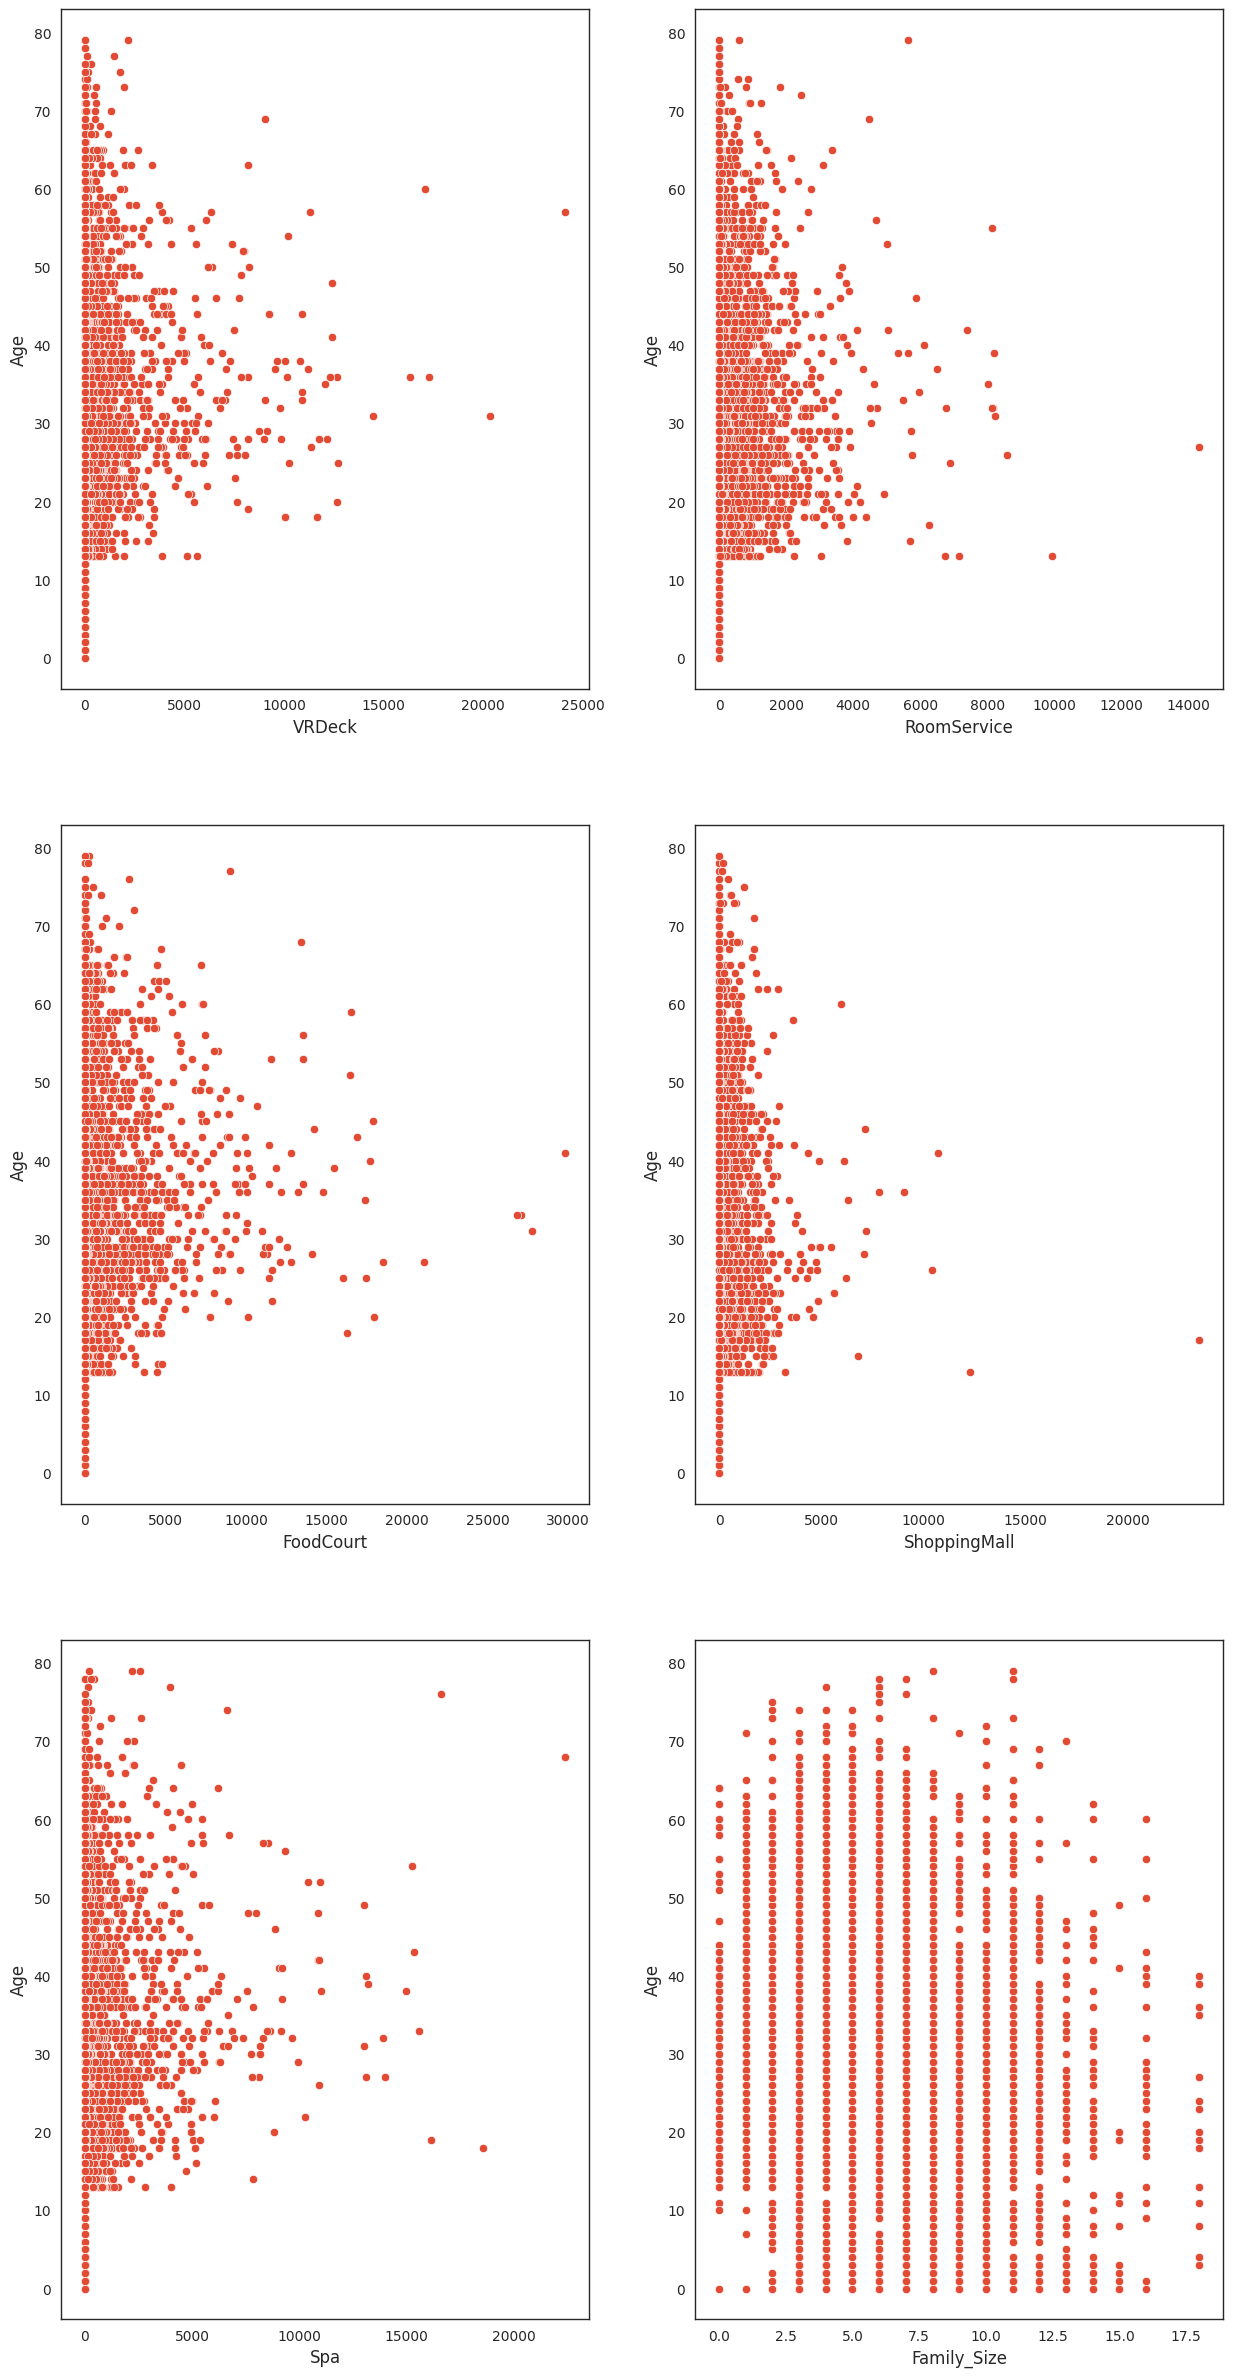

In [58]:
fig, ax = plt.subplots(3,2, figsize=(15,30))
sns.scatterplot(data1,x='VRDeck', y='Age', ax = ax[0,0])
sns.scatterplot(data1,x='RoomService', y='Age', ax = ax[0,1])
sns.scatterplot(data1,x='FoodCourt', y='Age', ax = ax[1,0])
sns.scatterplot(data1,x='ShoppingMall', y='Age', ax = ax[1,1])
sns.scatterplot(data1,x='Spa', y='Age', ax = ax[2,0])
sns.scatterplot(data1,x='Family_Size', y='Age', ax = ax[2,1])


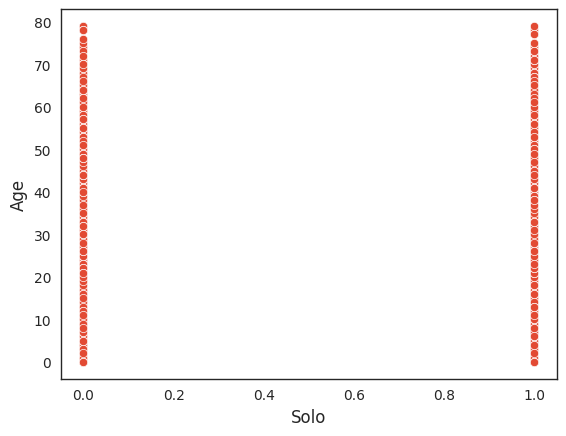

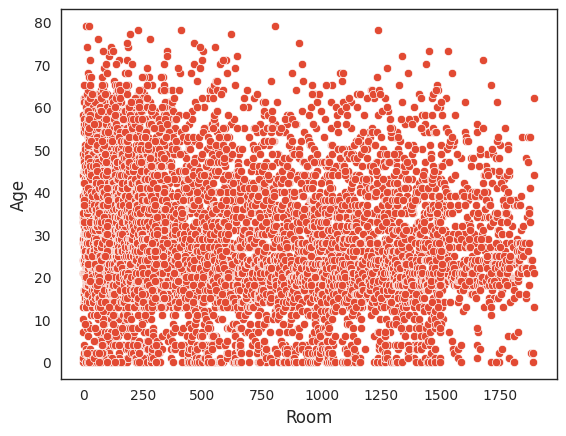

In [59]:
plt.figure()
sns.scatterplot(data1,x = 'Solo', y = 'Age')
plt.figure()
sns.scatterplot(data1,x='Room', y = 'Age')
plt.show()

# **DECK**

In [60]:
data1.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group,Expenditure,No_spending,Group_number,Group_size,Solo,Deck,Room,Side,Room_region1,Room_region2,Room_region3,Room_region4,Room_region5,Room_region6,Room_region7,Room_region,Surname,Family_Size
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Age_34_40,0.0,1,1,1,1.0,B,0.0,P,1,0,0,0,0,0,0,1,Ofracculy,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Age_18_24,736.0,0,2,1,1.0,F,0.0,S,1,0,0,0,0,0,0,1,Vines,4
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Age_50+,10383.0,0,3,2,0.0,A,0.0,S,1,0,0,0,0,0,0,1,Susent,6
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Age_30_33,5176.0,0,3,2,0.0,A,0.0,S,1,0,0,0,0,0,0,1,Susent,6
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Age_13_17,1091.0,0,4,1,1.0,F,1.0,S,1,0,0,0,0,0,0,1,Santantines,6


<Axes: xlabel='Deck', ylabel='count'>

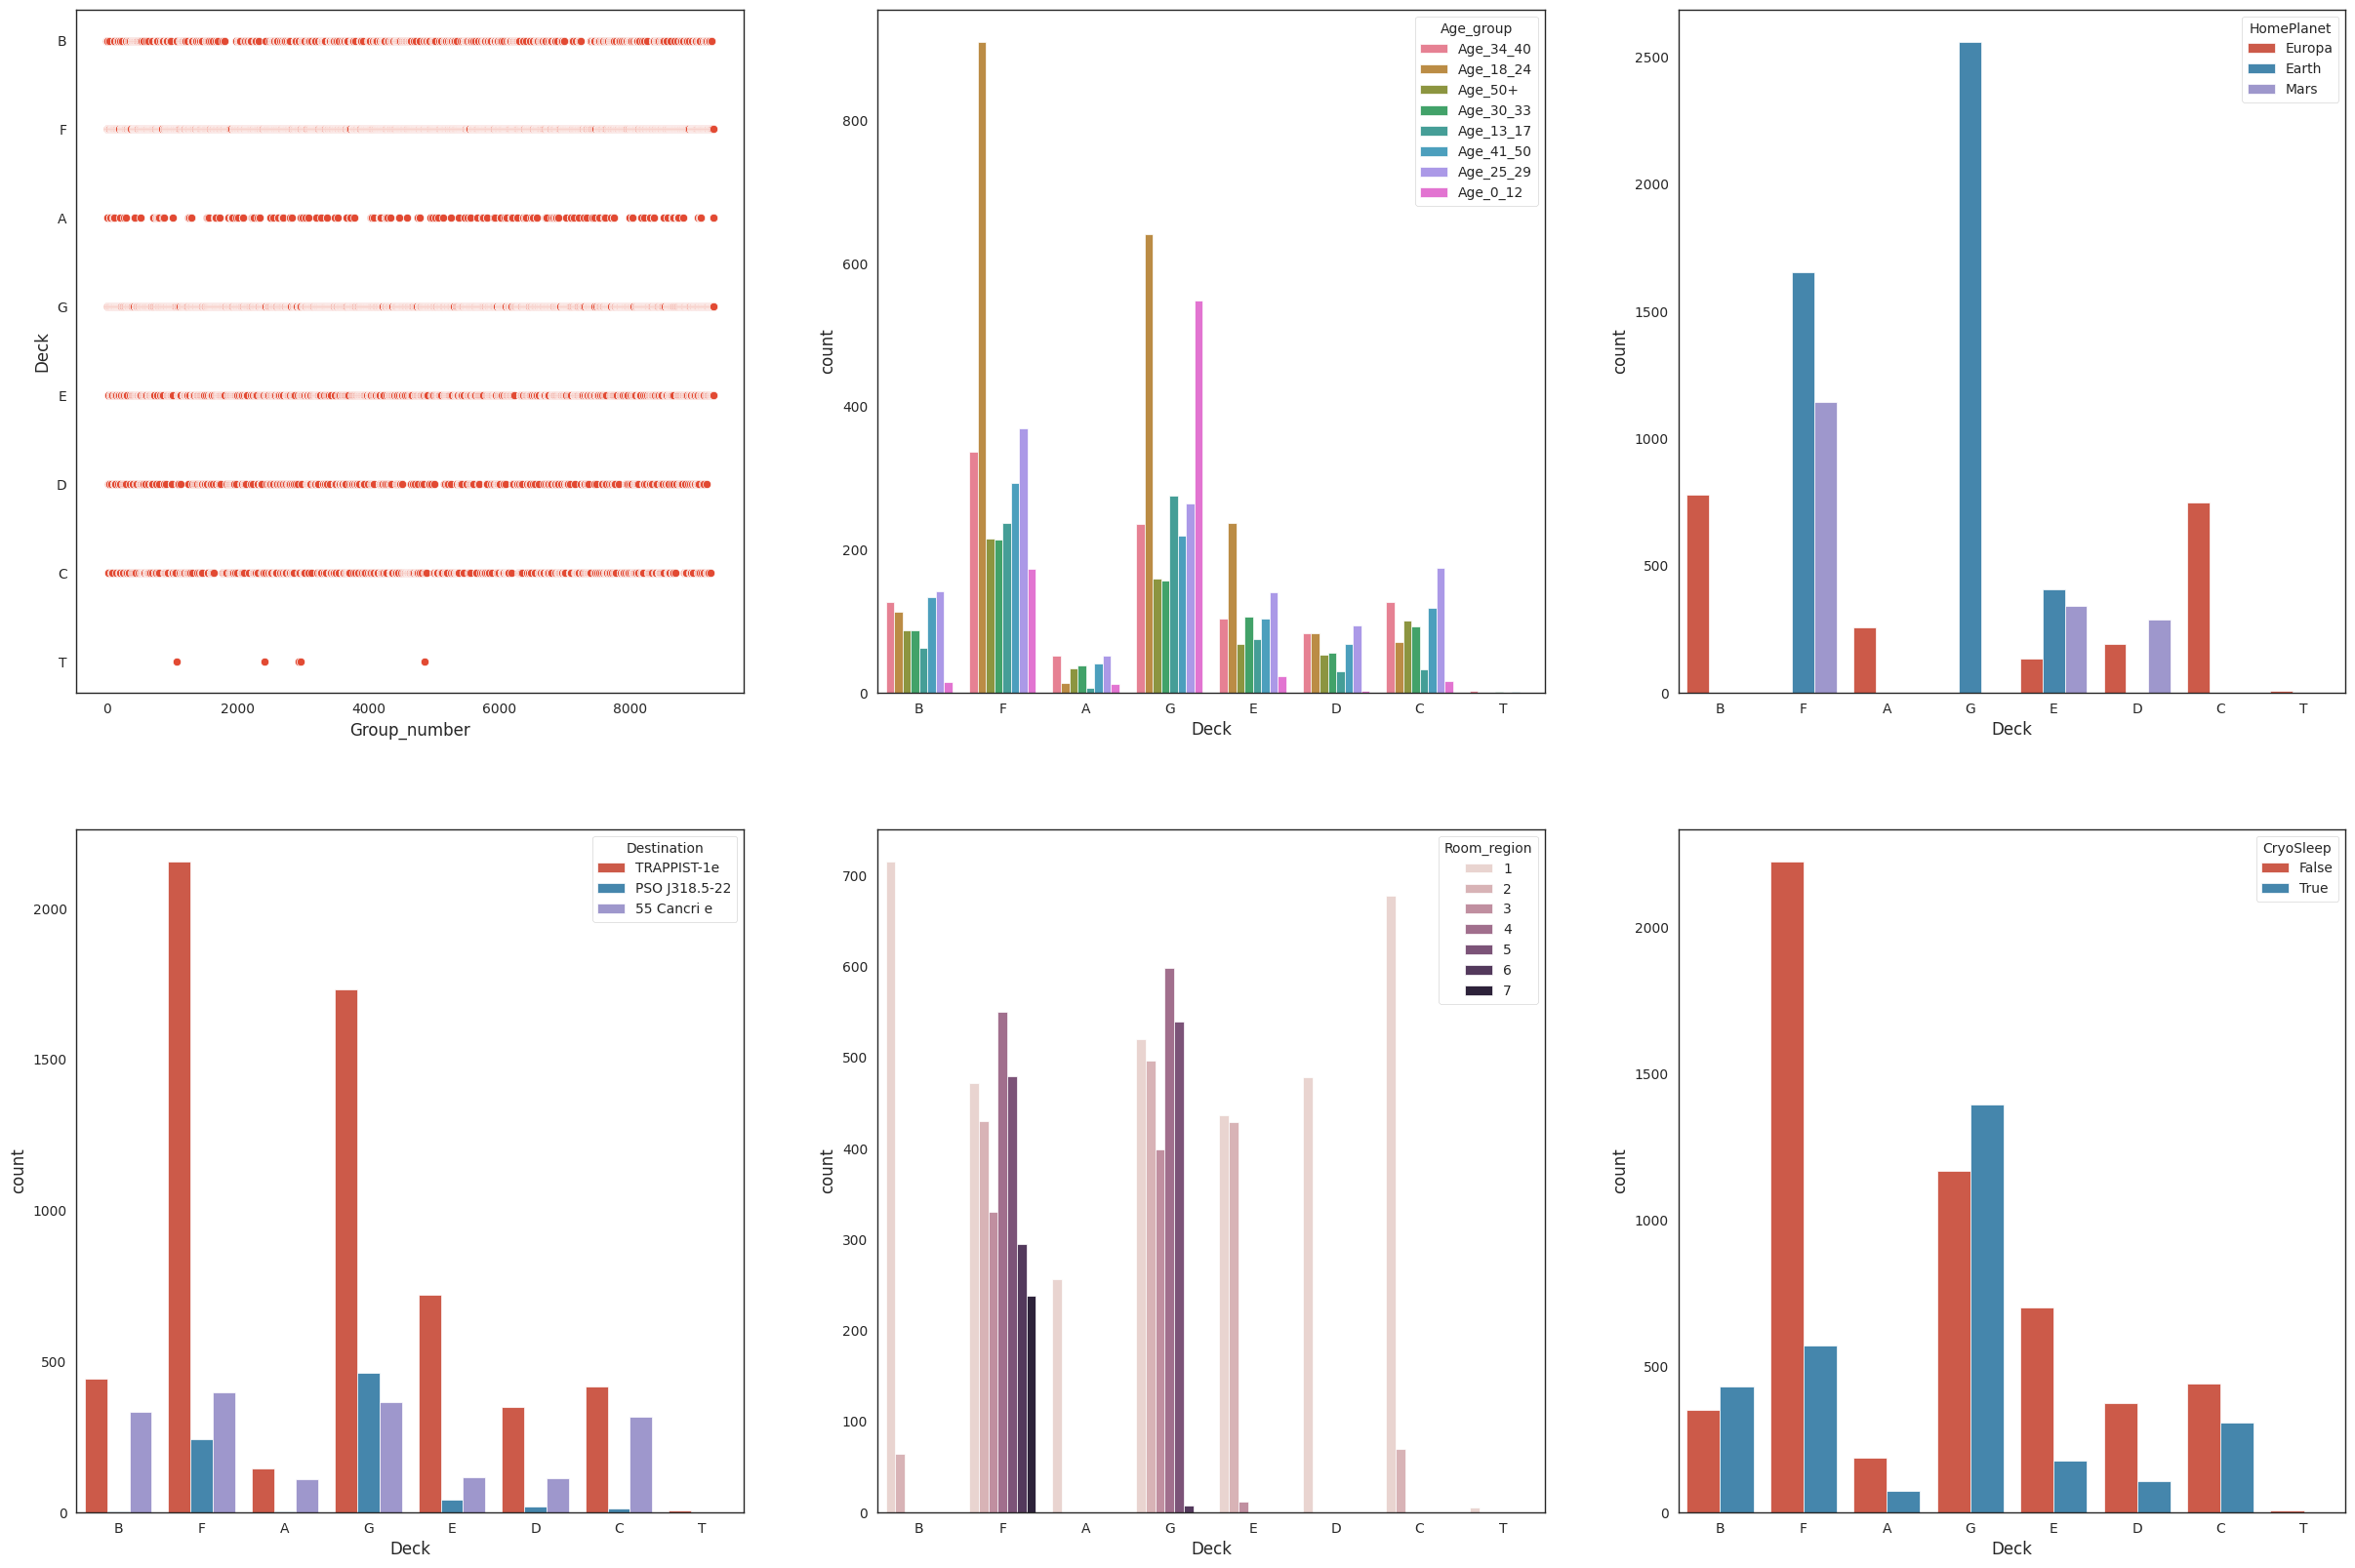

In [61]:
fig, ax = plt.subplots(2,3, figsize=(30,20))
sns.scatterplot(data1, x='Group_number', y = 'Deck', ax = ax[0,0])
sns.countplot(data1,x ='Deck', hue = 'Age_group', ax= ax[0,1])
sns.countplot(data1,x ='Deck', hue = 'HomePlanet', ax= ax[0,2])
sns.countplot(data1,x ='Deck', hue = 'Destination', ax= ax[1,0])
sns.countplot(data1,x ='Deck', hue = 'Room_region', ax= ax[1,1])
sns.countplot(data1,x ='Deck', hue = 'CryoSleep', ax= ax[1,2])





In [62]:
homogeneity_in_group(data1, 'Group_number', 'Deck')
homogeneity_in_group(data1, 'Surname', 'Deck')

Groups of size one are excuded from the analysis because of automatic 100% score
---
Deck is coherent in the Group_number in 70.18% 
Avrage size of the biggest Deck  in the Group_number: 87.04 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
Deck is coherent in the Surname in 23.23% 
Avrage size of the biggest Deck  in the Surname: 70.16 % 
***************************************


In [63]:
for data in data_cleaner:
    na_Before = data['Deck'].isna().sum()
    deck_rest_of_group = data.groupby(['Group_number', 'Deck']).size().unstack(fill_value=0)
    index_deckNa_knownGroup = data[data['Deck'].isna() & (data['Group_size'] >1) & data['Group_number'].isin(deck_rest_of_group.index)].index
    data.loc[index_deckNa_knownGroup, 'Deck'] = data.loc[index_deckNa_knownGroup, 'Group_number'].map(lambda x: deck_rest_of_group.idxmax(axis=1)[x])
    na_After = data['Deck'].isna().sum()
    print(f'Deck missing values before: {na_Before}, after: {na_After}')

Deck missing values before: 199, after: 99
Deck missing values before: 100, after: 63


In [64]:
for data in data_cleaner:
    na_Before = data['Deck'].isna().sum()
    groupBY = data.groupby(['HomePlanet','Destination','Solo','Deck'])['Deck'].size().unstack(fill_value=0)
    na_rows=data.loc[data['Deck'].isna(),'Deck'].index
    data.loc[data['Deck'].isna(),'Deck']=data.groupby(['HomePlanet','Destination','Solo'])['Deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows]
    na_After = data['Deck'].isna().sum()
    print(f'Deck missing values before: {na_Before}, after: {na_After}')

Deck missing values before: 99, after: 0
Deck missing values before: 63, after: 0


# **SIDE**

<Axes: xlabel='Side', ylabel='count'>

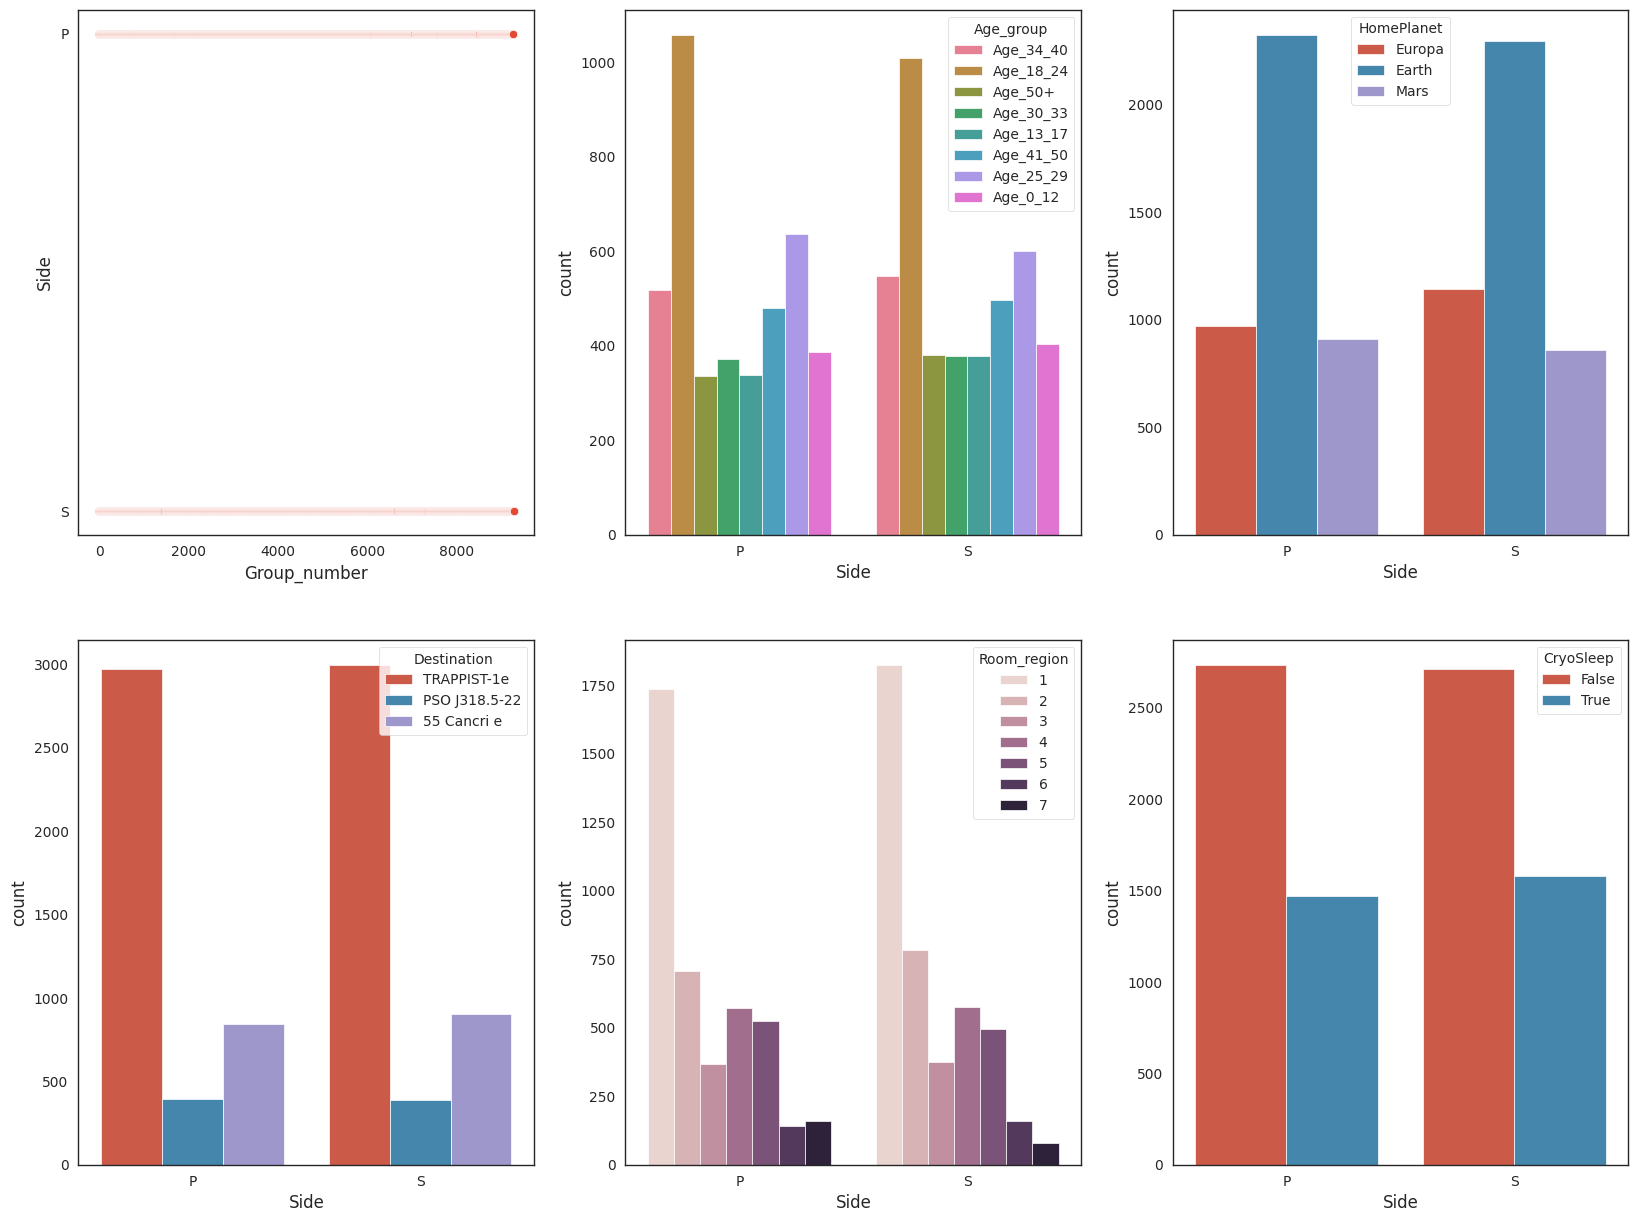

In [65]:
fig, ax = plt.subplots(2,3, figsize=(20,15))
sns.scatterplot(data1, x='Group_number', y = 'Side', ax = ax[0,0])
sns.countplot(data1,x ='Side', hue = 'Age_group', ax= ax[0,1])
sns.countplot(data1,x ='Side', hue = 'HomePlanet', ax= ax[0,2])
sns.countplot(data1,x ='Side', hue = 'Destination', ax= ax[1,0])
sns.countplot(data1,x ='Side', hue = 'Room_region', ax= ax[1,1])
sns.countplot(data1,x ='Side', hue = 'CryoSleep', ax= ax[1,2])


In [66]:
homogeneity_in_group(data1, 'Group_number','Side')
homogeneity_in_group(data1, 'Surname','Side')

Groups of size one are excuded from the analysis because of automatic 100% score
---
Side is coherent in the Group_number in 100.0% 
Avrage size of the biggest Side  in the Group_number: 100.0 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
Side is coherent in the Surname in 35.15% 
Avrage size of the biggest Side  in the Surname: 77.79 % 
***************************************


In [67]:
# IF you are in the group with known side you have the same side as the rest of the group
for data in data_cleaner:
    side_naBefore = data['Side'].isna().sum()
    Side_rest_of_group = data.groupby(['Group_number', 'Side']).size().unstack(fill_value=0)
    index_sideNa_knownGroup = data[data['Side'].isna() & (data['Group_size'] >1) & data['Group_number'].isin(Side_rest_of_group.index)].index
    data.loc[index_sideNa_knownGroup, 'Side'] = data.loc[index_sideNa_knownGroup, 'Group_number'].map(lambda x: Side_rest_of_group.idxmax(axis=1)[x])
    side_naAfter = data['Side'].isna().sum()
    print(f'side missing values before: {side_naBefore}, after: {side_naAfter}')

side missing values before: 199, after: 99
side missing values before: 100, after: 63


In [68]:
for data in data_cleaner:
    side_naBefore = data['Side'].isna().sum()

    data.loc[data['Side'].isna(), 'Side'] = 'X'

    side_naAfter = data['Side'].isna().sum()
    print(f'side missing values before: {side_naBefore}, after: {side_naAfter}')

side missing values before: 99, after: 0
side missing values before: 63, after: 0


# **ROOM**

In [69]:
homogeneity_in_group(data1,'Group_number','Room')
homogeneity_in_group(data1,'Surname','Room')

Groups of size one are excuded from the analysis because of automatic 100% score
---
Room is coherent in the Group_number in 70.25% 
Avrage size of the biggest Room  in the Group_number: 87.07 % 
***************************************
Groups of size one are excuded from the analysis because of automatic 100% score
---
Room is coherent in the Surname in 9.25% 
Avrage size of the biggest Room  in the Surname: 45.98 % 
***************************************


In [70]:
for data in data_cleaner:
    room_naBefore = data['Room'].isna().sum()
    room_rest_of_group = data.groupby(['Group_number', 'Room']).size().unstack(fill_value=0)
    index_roomNa_knownGroup = data[data['Room'].isna() & (data['Group_size'] >1) & data['Group_number'].isin(room_rest_of_group.index)].index
    data.loc[index_roomNa_knownGroup, 'Room'] = data.loc[index_roomNa_knownGroup, 'Group_number'].map(lambda x: room_rest_of_group.idxmax(axis=1)[x])
    room_naAfter = data['Room'].isna().sum()
    print(f'room missing values before: {room_naBefore}, after: {room_naAfter}')

room missing values before: 199, after: 99
room missing values before: 100, after: 63


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Room', ylabel='Group_number'>

Text(0.5, 1.0, 'Room vs group coloured by group ')

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Room', ylabel='Group_number'>

Text(0.5, 1.0, 'Room vs group coloured by group ')

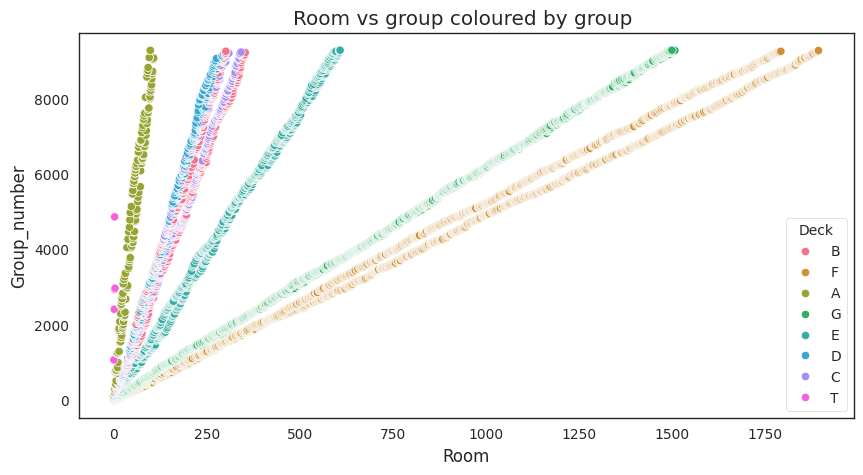

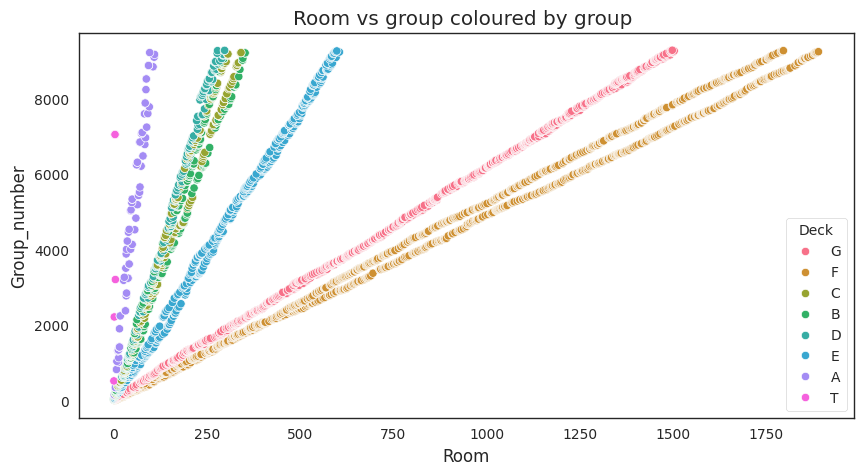

In [71]:

for data in data_cleaner:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data = data, x= 'Room', y='Group_number', hue='Deck')
    plt.title('Room vs group coloured by group ')

In [72]:

from sklearn.linear_model import LinearRegression

for data in data_cleaner:
    na_Before = data['Room'].isna().sum()
    for deck in ['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T']:
        data_deck = data.loc[data['Deck'] == deck]

        model = LinearRegression()
        if data_deck['Room'].isnull().sum() > 0:
            data_deck_train = data_deck.loc[~data_deck['Room'].isna()]
            data_deck_pred = data_deck.loc[data_deck['Room'].isna()]
            model.fit(data_deck_train['Group_number'].values.reshape(-1,1), data_deck_train['Room'].values.reshape(-1))
            data.loc[(data['Deck'] == deck) & data['Room'].isna(),'Room'] = model.predict(data_deck_pred['Group_number'].values.reshape(-1,1)).round(0).astype(int)




    na_After = data['Room'].isna().sum()
    print(f'Missing values before: {na_Before}, after: {na_After}')


LinearRegression()

LinearRegression()

LinearRegression()

Missing values before: 99, after: 0


LinearRegression()

LinearRegression()

LinearRegression()

Missing values before: 63, after: 0


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Room', ylabel='Group_number'>

Text(0.5, 1.0, 'Room vs group coloured by group ')

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Room', ylabel='Group_number'>

Text(0.5, 1.0, 'Room vs group coloured by group ')

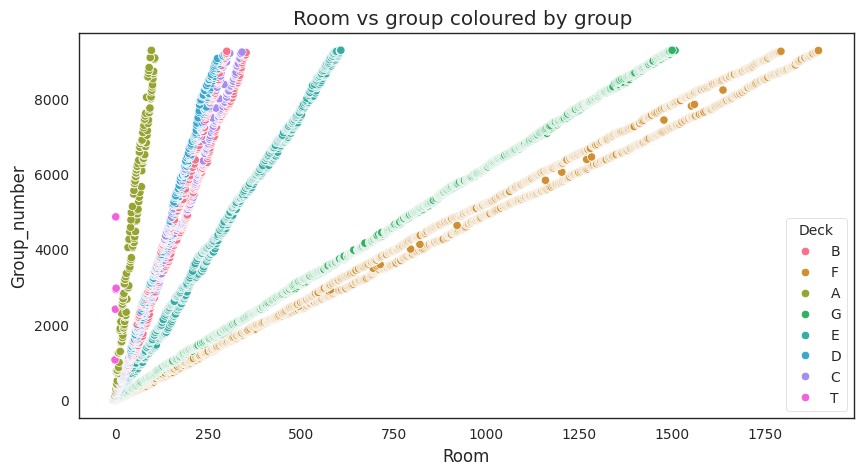

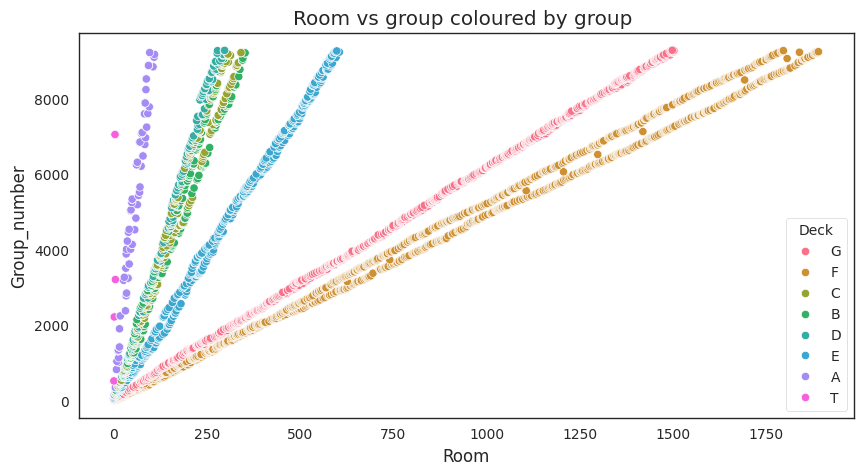

In [73]:

for data in data_cleaner:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data = data, x= 'Room', y='Group_number', hue='Deck')
    plt.title('Room vs group coloured by group ')

In [74]:
for data in data_cleaner:
    data['Room'] = data['Room'].astype(float)
    data['Room_region1'] = (data['Room'] < 300).astype(int)
    data['Room_region2'] = ((data['Room'] >= 300) & (data['Room'] < 600)).astype(int)
    data['Room_region3'] = ((data['Room'] >= 600) & (data['Room'] < 830)).astype(int)
    data['Room_region4'] = ((data['Room'] >= 830) & (data['Room'] < 1170)).astype(int)
    data['Room_region5'] = ((data['Room'] >= 1170) & (data['Room'] < 1500)).astype(int)
    data['Room_region6'] = ((data['Room'] >= 1500) & (data['Room'] < 1700)).astype(int)
    data['Room_region7'] = (data['Room'] >= 1700).astype(int)

    data['Room_region'] = data['Room'].apply(lambda x: 1 if x < 300 else 2 if x < 600 else 3 if x < 830 else 4 if x < 1170 else 5 if x < 1500 else 6 if x < 1700 else 7)

# **AGE**

<Axes: xlabel='Age', ylabel='count'>

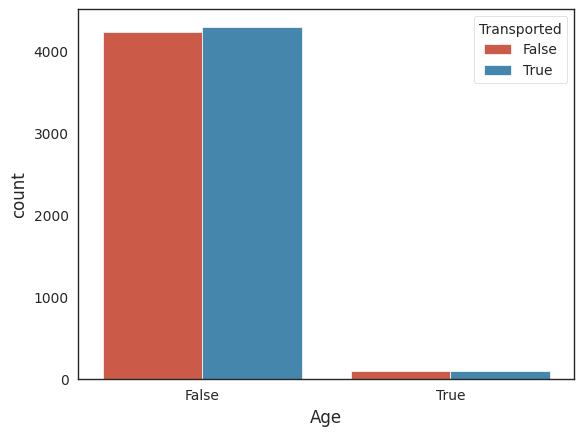

In [75]:
age_trans = (data1['Age'].isnull() == 1)
sns.countplot(data=data1, x= age_trans, hue='Transported' )


In [76]:
#Lack of corelation between nan Age and Transportation
for data in data_cleaner:
    na_Before = data['Age'].isna().sum()
    show = data.groupby(['HomePlanet','No_spending','Deck','Solo'])['Age'].median().unstack(fill_value=0)
    na_rows = data.loc[data['Age'].isna(),'Age'].index
    data.loc[data['Age'].isna(),'Age'] = data.groupby(['HomePlanet','No_spending','Solo','Deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows]
    na_After = data['Age'].isna().sum()
    print(f'Age missing values before: {na_Before}, after: {na_After}')

Age missing values before: 179, after: 0
Age missing values before: 91, after: 0


In [77]:
for data in data_cleaner:
    data['Age_group'] = np.nan
    data.loc[data['Age'] <= 12, 'Age_group'] = 'Age_0_12'
    data.loc[(data['Age'] > 12) & (data['Age'] <= 17), 'Age_group'] = 'Age_13_17'
    data.loc[(data['Age'] > 17) & (data['Age'] <= 24), 'Age_group'] = 'Age_18_24'
    data.loc[(data['Age'] > 24) & (data['Age'] <= 29), 'Age_group'] = 'Age_25_29'
    data.loc[(data['Age'] > 29) & (data['Age'] <= 33), 'Age_group'] = 'Age_30_33'
    data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age_group'] = 'Age_34_40'
    data.loc[(data['Age'] > 40) & (data['Age'] <= 50) , 'Age_group'] = 'Age_41_50'
    data.loc[(data['Age'] > 50),'Age_group'] = 'Age_50+'


In [78]:
data1.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
Age_group         0
Expenditure       0
No_spending       0
Group_number      0
Group_size        0
Solo              0
Deck              0
Room              0
Side              0
Room_region1      0
Room_region2      0
Room_region3      0
Room_region4      0
Room_region5      0
Room_region6      0
Room_region7      0
Room_region       0
Surname         104
Family_Size       0
dtype: int64

In [79]:
for data in data_cleaner:
    na_Before = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].isna().sum().sum()
    data.loc[data['CryoSleep'] == 1, ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = 0
    na_After = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].isna().sum().sum()
    print(f'Expenditure missing values before: {na_Before}, after: {na_After}')


Expenditure missing values before: 943, after: 571
Expenditure missing values before: 467, after: 295


In [80]:
for data in data_cleaner:
    na_Before = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].isna().sum().sum()
    for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
        na_rows = data.loc[data[col].isna()].index
        data.loc[na_rows, col] = data.groupby(['HomePlanet','Destination','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    na_After = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].isna().sum().sum()
    print(f'Expenditure missing values before: {na_Before}, after: {na_After}')

Expenditure missing values before: 571, after: 1
Expenditure missing values before: 295, after: 0


In [81]:
for data in data_cleaner:
    data['Expenditure'] = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis = 1)
    data['No_spending'] = (data['Expenditure'] == 0).astype(int)

In [82]:
data1.loc[data1['RoomService'].isna(), 'RoomService'] = 0.0

In [83]:
for data in data_cleaner:
    data.drop('Surname', axis=1, inplace=True)

# **Encoding**

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for data in data_cleaner:
    data['Side_Code'] = le.fit_transform(data['Side'])
    data['CryoSleep'] = le.fit_transform(data['CryoSleep'])
    data['VIP'] = le.fit_transform(data['VIP'])


In [85]:
for data in data_cleaner:
  for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Expenditure']:
    data[col] = np.log(1+data[col])

In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for data in data_cleaner:
  for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Expenditure','Age']:
    data[col] = sc.fit_transform(data[col].values.reshape(-1,1))

In [177]:
TARGET = 'Transported'

ORGINAL = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name','Deck', 'Room', 'Side']

TRAIN_BINS=['HomePlanet_Code','CryoSleep', 'Destination_Code','Age_group_Code','VIP', 'Deck_Code','Side_Code','Room_region1', 'Room_region2', 'Room_region3', 'Room_region4',
       'Room_region5', 'Room_region6', 'Room_region7','Expenditure', 'No_spending', 'Solo','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]

TRAIN_DUMMY=['HomePlanet','CryoSleep', 'Destination','Age_group','VIP', 'Deck','Side_Code','Room_region1', 'Room_region2', 'Room_region3', 'Room_region4',
       'Room_region5', 'Room_region6', 'Room_region7','Expenditure', 'No_spending', 'Solo','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]

In [115]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformers = [
    ('one_hot', OneHotEncoder(), ['HomePlanet', 'Destination', 'Deck', 'Age_group'])
]


ct = ColumnTransformer(transformers=transformers, remainder='passthrough')

train_dummy = ct.fit_transform(data1[TRAIN_DUMMY])
test_dummy = ct.fit_transform(data_cleaner[1][TRAIN_DUMMY])


In [119]:
data_dummy = [pd.DataFrame(train_dummy),pd.DataFrame(test_dummy)]

In [135]:
from sklearn.decomposition import PCA
pca = PCA( n_components=0.95).fit(data_dummy[0])

data_dummy[0] = pd.DataFrame(pca.transform(data_dummy[0]))
data_dummy[1] = pd.DataFrame(pca.transform(data_dummy[1]))



In [136]:
data_dummy[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.719119,0.496652,0.822646,0.438627,0.014357,0.224268,-0.179370,-0.355950,-0.447098,0.828285,0.092975,-0.304234,0.232029,-0.689936,-0.579328,-0.139302,0.561221,-0.094227
1,1.998869,-0.471665,-0.115829,-0.761609,0.457301,0.625875,-0.074274,0.015484,0.494777,0.610368,-0.847060,0.076660,-0.011360,0.035777,-0.086879,0.053566,-0.076428,0.222735
2,2.996166,1.873434,1.322304,-1.007564,0.587580,-0.377039,-0.161417,-0.581865,0.379340,-0.374189,-0.222379,-0.020892,-0.232093,0.024591,-0.050955,0.154508,-0.100082,0.205572
3,3.104162,1.438980,0.177577,1.173075,1.542248,0.196053,-0.187983,-0.647174,0.379206,-0.411908,-0.146617,-0.013020,-0.451372,0.058271,-0.011220,0.143996,-0.118792,0.202700
4,2.235031,-1.041015,0.359676,-0.476632,0.973792,-0.392194,0.070112,-0.176354,0.483202,0.256047,-0.235840,-0.576570,0.071907,-0.181724,-0.187322,0.127395,-0.259980,0.455693


In [89]:
data1[ORGINAL].head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Room,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,-0.656458,-0.667714,-0.640620,-0.683763,-0.657938,Maham Ofracculy,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,1.059011,0.113133,0.617768,1.577944,0.718427,Juanna Vines,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,0.724605,2.107041,-0.640620,2.474871,0.756521,Altark Susent,A,0.0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,-0.656458,1.759600,1.645459,2.223420,1.246747,Solam Susent,A,0.0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,1.430006,0.777836,1.299774,1.588223,-0.260716,Willy Santantines,F,1.0,S


In [90]:
data1[TRAIN_BINS].head()

,HomePlanet_Code,CryoSleep,Destination_Code,Age_group_Code,VIP,Deck_Code,Side_Code,Room_region1,Room_region2,Room_region3,Room_region4,Room_region5,Room_region6,Room_region7,Expenditure,No_spending,Solo,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,2,5,0,1,0,1,0,0,0,0,0,0,-1.158451,1,1.0,-0.656458,-0.667714,-0.640620,-0.683763,-0.657938
1,0,0,2,2,0,5,1,1,0,0,0,0,0,0,0.628962,0,1.0,1.059011,0.113133,0.617768,1.577944,0.718427
2,1,0,2,7,1,0,1,1,0,0,0,0,0,0,1.345118,0,0.0,0.724605,2.107041,-0.640620,2.474871,0.756521
3,1,0,2,4,0,0,1,1,0,0,0,0,0,0,1.156690,0,0.0,-0.656458,1.759600,1.645459,2.223420,1.246747
4,0,0,2,1,0,5,1,1,0,0,0,0,0,0,0.735401,0,1.0,1.430006,0.777836,1.299774,1.588223,-0.260716


In [100]:
data1[TRAIN_BINS].shape

(8693, 22)

In [178]:
from sklearn.model_selection import train_test_split


trainX, testX, trainY, testY= train_test_split(data_cleaner[0][TRAIN_BINS], data_cleaner[0][TARGET], random_state = 0,shuffle=True)
trainX_d, testX_d, trainY_d, testY_d =train_test_split(data_dummy[0], data_cleaner[0][TARGET], random_state = 0,shuffle=True)


Exploratory Analysis

In [ ]:

for col in ['VIP','No_spending','CryoSleep','Solo','HomePlanet','Destination','Age_group','Deck']:
        print(data1[[col,TARGET]].groupby(col, as_index=False).mean())

        print('-'*10, '\n')

   VIP  Transported
0    0     0.506594
1    1     0.378109
---------- 

   No_spending  Transported
0            0     0.298753
1            1     0.787754
---------- 

   CryoSleep  Transported
0          0     0.328176
1          1     0.814673
---------- 

   Solo  Transported
0   0.0     0.566872
1   1.0     0.452445
---------- 

  HomePlanet  Transported
0      Earth     0.423420
1     Europa     0.660534
2       Mars     0.524100
---------- 

     Destination  Transported
0    55 Cancri e     0.610000
1  PSO J318.5-22     0.503769
2    TRAPPIST-1e     0.472199
---------- 

   Age_group  Transported
0   Age_0_12     0.696126
1  Age_13_17     0.553451
2  Age_18_24     0.457209
3  Age_25_29     0.497370
4  Age_30_33     0.443467
5  Age_34_40     0.485714
6  Age_41_50     0.497988
7    Age_50+     0.484396
---------- 

  Deck  Transported
0    A     0.503817
1    B     0.732412
2    C     0.679028
3    D     0.433265
4    E     0.360452
5    F     0.439042
6    G     0.513647
7    T

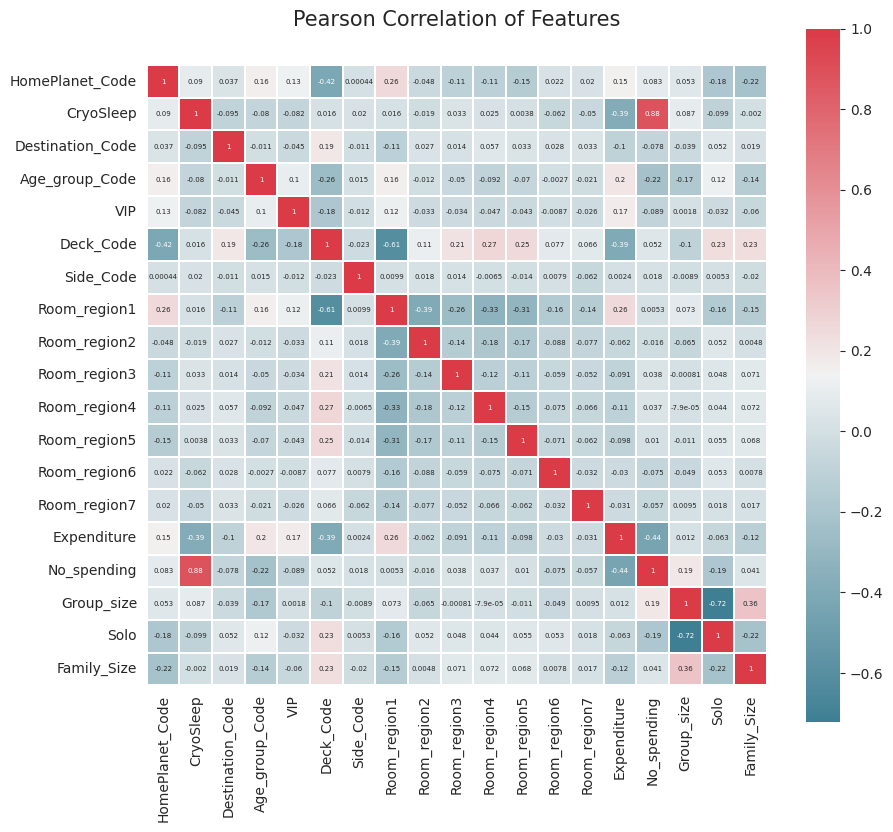

In [ ]:

def correlation_heatmap(dataf):
    _, ax = plt.subplots(figsize=(10, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        dataf.corr(numeric_only=True),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':5 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()

correlation_heatmap(data1[TRAIN_BINS])

MODELING

In [91]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier, Perceptron,RidgeClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

MODELS = [
    #Ensemble Methods
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Gaussian Processes
    GaussianProcessClassifier(),

    #GLM
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),

    #Navies Bayes
    BernoulliNB(),
    GaussianNB(),

    #Nearest Neighbor
    KNeighborsClassifier(),

    #SVM
    SVC(probability=True),
    NuSVC(probability=True),
    LinearSVC(),

    #Trees
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),

    #Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    XGBClassifier()
]

In [179]:
from sklearn import model_selection
model_col = ['Name','Parameters','Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy 3*STD' ,'Time']
model_compare = pd.DataFrame(columns = model_col)
model_predict = pd.DataFrame(testY.copy(deep=True))

row_index = 0
for mod in MODELS:
    MLA_name = mod.__class__.__name__
    model_compare.loc[row_index, 'Name'] = MLA_name
    model_compare.loc[row_index, 'Parameters'] = str(mod.get_params())
    cv_partition = model_selection.StratifiedKFold(n_splits = 3)
    cv_results = model_selection.cross_validate(mod, trainX_d, trainY_d, cv  = cv_partition, return_train_score=True)
    model_compare.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    model_compare.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    model_compare.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    model_compare.loc[row_index, 'Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    mod.fit(trainX, trainY)
    model_predict[MLA_name] = mod.predict(testX)

    row_index+=1

model_compare.sort_values(by = ['Test Accuracy Mean'], ascending = False, inplace = True)


In [185]:
model_compare

,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy 3*STD,Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.815616,0.794907,0.031042,3.329825
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.864857,0.789078,0.017475,38.276812
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.838012,0.788925,0.02613,3.056377
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.793757,0.785857,0.059288,4.419431
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.952677,0.782022,0.029315,1.903598
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.780181,0.77696,0.046944,0.414677
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.779261,0.776193,0.051142,0.024937
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.952447,0.776039,0.018327,0.497771
19,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.779337,0.776039,0.050992,0.012149
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.780565,0.775886,0.047678,0.288221


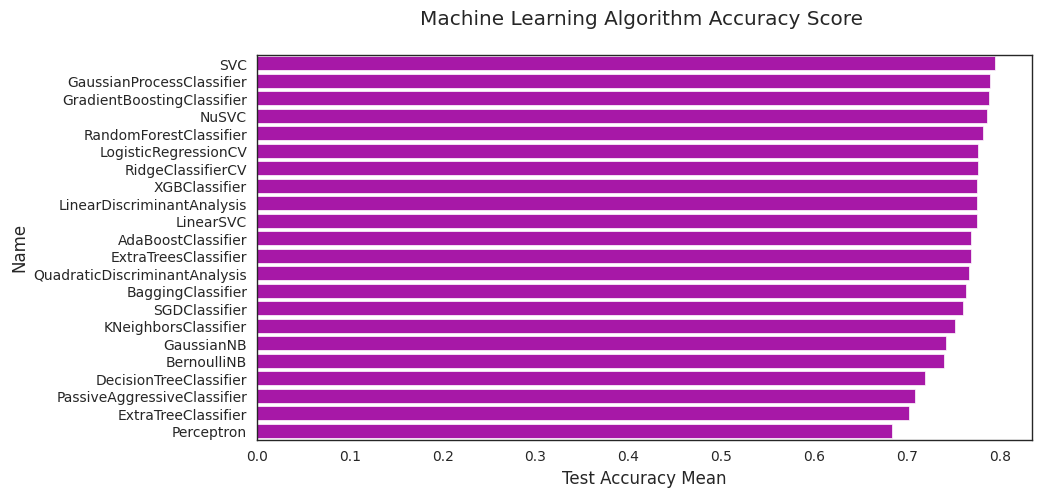

In [186]:
plt.figure(figsize=(10,5))
sns.barplot(x='Test Accuracy Mean', y = 'Name', data = model_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.show()

In [140]:
#Desicion tree classifier (tune simple model)
from scipy.stats import randint, uniform
param_dist = {'max_depth': randint(2,50), 'min_samples_leaf': randint(1,20),'min_samples_split': randint(1,30), 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}
model = DecisionTreeClassifier( random_state= 1)
cv_results = model_selection.cross_validate(model, trainX_d, trainY_d, cv  = cv_partition, scoring = 'roc_auc',  return_train_score=True)

my_score = {'acc':'accuracy', 'roc':'roc_auc'}
cv = model_selection.StratifiedKFold(n_splits = 10)
tuned_model = model_selection.RandomizedSearchCV(DecisionTreeClassifier(),n_iter=150, param_distributions= param_dist , cv = cv, scoring = 'roc_auc', return_train_score=True)
print(f'Accuracy befroe tunning train_set: {cv_results["train_score"].mean()}')
tuned_model.fit(trainX_d, trainY_d)

print('------------------------------------------------------------------')
print(f'Accuracy after tunning train_set roc_auc: {tuned_model.score(trainX_d, trainY_d)}')
print(f'Accuracy after tunning test_set roc_auc: {tuned_model.score(testX_d, testY_d)}')


Accuracy befroe tunning train_set: 0.9948383956407877
------------------------------------------------------------------
Accuracy after tunning train_set roc_auc: 0.9081398995733949
Accuracy after tunning test_set roc_auc: 0.8803117136378525


In [141]:
tuned_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 16,
 'min_samples_split': 9,
 'splitter': 'best'}

In [ ]:
# {'criterion': 'gini',
#  'max_depth': 6,
#  'min_samples_leaf': 9,
#  'splitter': 'best'} 81.4%
# {'criterion': 'gini',
#  'max_depth': 6,
#  'min_samples_leaf': 15,
#  'splitter': 'best'} 81.5%

# {'criterion': 'gini',
#  'max_depth': 7,
#  'min_samples_leaf': 17,
#  'min_samples_split': 24,
#  'splitter': 'best'}
# Accuracy after tunning train_set roc_auc: 0.8429825719007692
# Accuracy after tunning test_set roc_auc: 0.8156938523143645


# {'criterion': 'entropy',
#  'max_depth': 7,
#  'min_samples_leaf': 13,
#  'min_samples_split': 22,
#  'splitter': 'best'}
#  ------------------------------------------------------------------
# Accuracy after tunning train_set roc_auc: 0.8998313045387005
# Accuracy after tunning test_set roc_auc: 0.8815698930737921

#only standarization metters there is no difference between onehotendocing and labal encoding


In [98]:
def submit_kaggle(model,file_name):
  result = pd.DataFrame(data_cleaner[1]['PassengerId'])

  model.fit(data1[TRAIN_BINS], data1[TARGET])
  result['Transported'] = model.predict(data_cleaner[1][TRAIN_BINS])
  result.loc[result['Transported'] == 1, 'Transported'] = 'True'
  result.loc[result['Transported'] == 0, 'Transported'] = 'False'
  result.to_csv(file_name +'.csv', index=False)

In [99]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=13,min_samples_split= 22,splitter='best')
submit_kaggle(tree,'tree')

In [ ]:
from sklearn import feature_selection
print('BEFORE DT RFE Training Shape Old: ', trainX.shape)
print('BEFORE DT RFE Training Columns Old: ', trainX.columns.values)

model_rfe = feature_selection.RFECV(DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=9,min_samples_split= 6,splitter='best'), step = 1,  scoring = 'roc_auc', cv = cv_partition)
model_rfe.fit(trainX, trainY)
X_rfe = trainX.columns.values[model_rfe.get_support()]
rfe_results = model_selection.cross_validate(model, trainX[X_rfe], trainY, cv  = cv_partition,scoring = 'roc_auc' return_train_score=True)
print('AFTER DT RFE Training Shape New: ', trainX[X_rfe].shape)
print('AFTER DT RFE Training Columns New: ', X_rfe)
print(f'Accuracy after RFE train_set: {rfe_results["train_score"].mean()}')
print(f'Accuracy after RFE test_set: {rfe_results["test_score"].mean()}')
# AFTER DT RFE Training Shape New:  (6518, 1)
# AFTER DT RFE Training Columns New:  ['No_spending']
# Accuracy after RFE train_set: 0.7374961928847725
# Accuracy after RFE test_set: 0.7374984686136478

BEFORE DT RFE Training Shape Old:  (6519, 19)
BEFORE DT RFE Training Columns Old:  ['HomePlanet_Code' 'CryoSleep' 'Destination_Code' 'Age_group_Code' 'VIP'
 'Deck_Code' 'Side_Code' 'Room_region1' 'Room_region2' 'Room_region3'
 'Room_region4' 'Room_region5' 'Room_region6' 'Room_region7' 'Expenditure'
 'No_spending' 'Group_size' 'Solo' 'Family_Size']
AFTER DT RFE Training Shape New:  (6519, 11)
AFTER DT RFE Training Columns New:  ['HomePlanet_Code' 'CryoSleep' 'Destination_Code' 'Age_group_Code'
 'Deck_Code' 'Side_Code' 'Room_region3' 'Room_region4' 'Expenditure'
 'Group_size' 'Family_Size']
Accuracy after RFE train_set: 0.9775357565317735
Accuracy after RFE test_set: 0.6731112116328819


In [ ]:
#Desicion tree classifier (tune simple model)
from scipy.stats import randint, uniform
param_dist = {'max_depth': randint(2,50), 'min_samples_leaf': randint(1,20),'min_samples_split': randint(1,30), 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}
model = DecisionTreeClassifier( random_state= 1)
cv_results = model_selection.cross_validate(model, trainX, trainY, cv  = cv_partition, scoring = 'roc_auc',  return_train_score=True)

my_score = {'acc':'accuracy', 'roc':'roc_auc'}
cv = model_selection.StratifiedKFold(n_splits = 10)
tuned_model = model_selection.RandomizedSearchCV(DecisionTreeClassifier(),n_iter=150, param_distributions= param_dist , cv = cv, scoring = 'roc_auc', return_train_score=True)
print(f'Accuracy befroe tunning train_set: {cv_results["train_score"].mean()}')
tuned_model.fit(trainX[X_rfe], trainY)

print('------------------------------------------------------------------')
print(f'Accuracy after tunning train_set roc_auc: {tuned_model.score(trainX[X_rfe], trainY)}')
print(f'Accuracy after tunning test_set roc_auc: {tuned_model.score(testX[X_rfe], testY)}')

Accuracy befroe tunning train_set: 0.9995847826201508
------------------------------------------------------------------
Accuracy after tunning train_set roc_auc: 0.8323999955571779
Accuracy after tunning test_set roc_auc: 0.8168208391417803


In [ ]:
tuned_model.best_params_


{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 15,
 'min_samples_split': 4,
 'splitter': 'random'}

In [142]:
#print(f'Before tuning test mean accuracy:{model_compare[model_compare["Name"] == "GradientBoostingClassifier"]["Test Accuracy Mean"]}')
grad_dist = { 'learning_rate': uniform(0.05,0.15), 'max_depth': [3,5,7,10,15,None], 'min_samples_leaf': randint(7,20), 'n_estimators' : [40,50,60,70]}
gradient_tune = model_selection.RandomizedSearchCV(GradientBoostingClassifier(),n_iter=20, param_distributions= grad_dist, scoring='roc_auc', cv = cv, return_train_score=True)
gradient_tune.fit(trainX, trainY)

print(f'After tuning train mean accuracy:{gradient_tune.score(trainX, trainY)}')
print(f'After tuning test mean accuracy:{gradient_tune.score(testX, testY)}')

After tuning train mean accuracy:0.9383938237995578
After tuning test mean accuracy:0.903624216970568


In [143]:
gradient_tune.best_params_


#  {'learning_rate': 0.1421437893123003,
#  'max_depth': 5,
#  'min_samples_leaf': 14,
#  'n_estimators': 50}
#  After tuning train mean accuracy:0.9383938237995578
# After tuning test mean accuracy:0.903624216970568

{'learning_rate': 0.1421437893123003,
 'max_depth': 5,
 'min_samples_leaf': 14,
 'n_estimators': 50}

In [144]:
grad = GradientBoostingClassifier(learning_rate= 0.14,max_depth= 5,min_samples_leaf=14,n_estimators= 50)
submit_kaggle(grad,'gradient')

In [175]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    params = {
    'n_estimators': trial.suggest_int("n_estimators", 50, 1000),  # Number of boosting stages
    'learning_rate': trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),  # Learning rate
    'max_depth': trial.suggest_int("max_depth", 4, 10),  # Maximum depth of the individual estimators
    'min_samples_split': trial.suggest_int("min_samples_split", 2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': trial.suggest_int("min_samples_leaf", 1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),  # Number of features to consider when looking for the best split
    'subsample': trial.suggest_float("subsample", 0.5, 1.0),  # Fraction of samples used for fitting the individual base learners
}


    gdb = GradientBoostingClassifier(**params)
    gdb.fit(trainX, trainY)

    scores = cross_val_score(gdb, trainX, trainY,
                             cv = cv, scoring = 'accuracy', n_jobs=-1)

    return np.mean(scores)


study_gradient = optuna.create_study(direction = 'maximize')
study_gradient.optimize(objective, n_trials = 100)



[I 2024-03-18 13:29:51,926] A new study created in memory with name: no-name-302589b2-9073-4831-9803-1bd0e2a46db9
[I 2024-03-18 13:30:36,357] Trial 0 finished with value: 0.7922987758333097 and parameters: {'n_estimators': 201, 'learning_rate': 0.0023151684899125635, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'auto', 'subsample': 0.9759658462091412}. Best is trial 0 with value: 0.7922987758333097.
[I 2024-03-18 13:31:29,504] Trial 1 finished with value: 0.7990472420909784 and parameters: {'n_estimators': 653, 'learning_rate': 0.05206849617531527, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'subsample': 0.5013523456760306}. Best is trial 1 with value: 0.7990472420909784.
[I 2024-03-18 13:33:06,457] Trial 2 finished with value: 0.7962872126883604 and parameters: {'n_estimators': 912, 'learning_rate': 0.0023329146633049138, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'auto

In [176]:
print('Best hyperparameters:', study_gradient.best_params)
print('Best Acuuracy:', study_gradient.best_value)

Best hyperparameters: {'n_estimators': 873, 'learning_rate': 0.03677153656571287, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'subsample': 0.7065481356209431}
Best Acuuracy: 0.8119325624570035


In [181]:
gradient = GradientBoostingClassifier(**study_gradient.best_params)

submit_kaggle(gradient,'gradient')

In [192]:
cv = model_selection.StratifiedKFold(n_splits = 10)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 50, 1000),  # Number of boosting rounds
        'learning_rate': trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),  # Learning rate
        'max_depth': trial.suggest_int("max_depth", 3, 10),  # Maximum depth of a tree
        'min_child_weight': trial.suggest_float("min_child_weight", 1e-3, 1e3, log=True),  # Minimum sum of instance weight needed in a child
        'gamma': trial.suggest_float("gamma", 0.0, 1.0),  # Minimum loss reduction required to make a further partition on a leaf node of the tree
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),  # Subsample ratio of the training instances
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),  # Subsample ratio of columns when constructing each tree
        'reg_alpha': trial.suggest_float("reg_alpha", 1e-8, 100.0, log=True),  # L1 regularization term on weights
        'reg_lambda': trial.suggest_float("reg_lambda", 1e-8, 100.0, log=True),  # L2 regularization term on weights
        'scale_pos_weight': trial.suggest_float("scale_pos_weight", 1e-6, 1e6, log=True),  # Control the balance of positive and negative weights
    }

    gdb = XGBClassifier(**params)
    gdb.fit(trainX, trainY)

    scores = cross_val_score(gdb, trainX, trainY,
                             cv = cv, scoring = 'accuracy', n_jobs=-1)

    return np.mean(scores)


study_XGB = optuna.create_study(direction = 'maximize')
study_XGB.optimize(objective, n_trials = 200)

[I 2024-03-18 16:44:36,138] A new study created in memory with name: no-name-9df84471-a076-418d-8b2b-3d6ce86299ba
[I 2024-03-18 16:44:41,723] Trial 0 finished with value: 0.4967018649929792 and parameters: {'n_estimators': 596, 'learning_rate': 0.007448074802652771, 'max_depth': 6, 'min_child_weight': 120.19808665958683, 'gamma': 0.436099558115303, 'subsample': 0.9966349907118095, 'colsample_bytree': 0.6986914696564677, 'reg_alpha': 0.00018137754035460504, 'reg_lambda': 0.11596158603444251, 'scale_pos_weight': 0.011104961045967606}. Best is trial 0 with value: 0.4967018649929792.
[I 2024-03-18 16:44:43,555] Trial 1 finished with value: 0.6198790440379596 and parameters: {'n_estimators': 145, 'learning_rate': 0.012796951811070403, 'max_depth': 5, 'min_child_weight': 0.2962188750975875, 'gamma': 0.911676083544454, 'subsample': 0.9193685300291485, 'colsample_bytree': 0.6365497931936458, 'reg_alpha': 1.701942397928008e-05, 'reg_lambda': 1.401186157515332e-06, 'scale_pos_weight': 0.02350270

In [193]:
print('Best hyperparameters:', study_XGB.best_params)
print('Best Acuuracy:', study_XGB.best_value)
XGB = XGBClassifier(**study_XGB.best_params)

submit_kaggle(XGB,'XGB')

Best hyperparameters: {'n_estimators': 621, 'learning_rate': 0.02323771643205214, 'max_depth': 9, 'min_child_weight': 0.02165325841832801, 'gamma': 0.842941234753471, 'subsample': 0.8851355834683841, 'colsample_bytree': 0.7943850474042291, 'reg_alpha': 0.0004936929751703916, 'reg_lambda': 0.0008939448488878384, 'scale_pos_weight': 1.2133642611911921}
Best Acuuracy: 0.8123931563521906


In [189]:
cv = model_selection.StratifiedKFold(n_splits = 3)
def objective(trial):
      params = {
          'C': trial.suggest_loguniform("C", 1e-1, 100),  # Regularization parameter
          'kernel': trial.suggest_categorical("kernel", ['rbf']),  # Kernel type
          'gamma': trial.suggest_categorical("gamma", ['scale', 'auto']),  # Kernel coefficient
          'degree': trial.suggest_int("degree", 1, 10),  # Degree of the polynomial kernel
      }

      gdb = SVC(**params)
      gdb.fit(trainX, trainY)

      scores = cross_val_score(gdb, trainX, trainY,
                              cv = cv, scoring = 'accuracy', n_jobs=-1)

      return np.mean(scores)


study_SVC = optuna.create_study(direction = 'maximize')
study_SVC.optimize(objective, n_trials = 100)

[I 2024-03-18 16:35:50,841] A new study created in memory with name: no-name-304073f6-a8b2-4b1a-9c9f-9bed651735b3
[I 2024-03-18 16:36:02,697] Trial 0 finished with value: 0.7979751495628165 and parameters: {'C': 6.124376796301103, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 6}. Best is trial 0 with value: 0.7979751495628165.
[I 2024-03-18 16:36:09,256] Trial 1 finished with value: 0.7982819450836018 and parameters: {'C': 6.250643711699638, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2}. Best is trial 1 with value: 0.7982819450836018.
[I 2024-03-18 16:36:13,754] Trial 2 finished with value: 0.7884644884184691 and parameters: {'C': 0.7925970018220341, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 3}. Best is trial 1 with value: 0.7982819450836018.
[I 2024-03-18 16:36:21,284] Trial 3 finished with value: 0.7932198189906426 and parameters: {'C': 20.440524935897514, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2}. Best is trial 1 with value: 0.7982819450836018.
[I 2024-03-18 16:36:25,706] Tria

KeyboardInterrupt: 

In [ ]:
print('Best hyperparameters:', study_SVC.best_params)
print('Best Acuuracy:', study_SVC.best_value)
SVC = XGBClassifier(**study_SVC.best_params)

submit_kaggle(SVC,'SVC')

In [165]:
from catboost import CatBoostClassifier

def objective(trial):
    params = {
         'iterations': trial.suggest_int("iterations", 50, 1000),
        'learning_rate': trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        'depth': trial.suggest_int("depth", 4, 10),
        'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        'bootstrap_type': trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        'random_strength': trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        'bagging_temperature':trial.suggest_float("bagging_temperature", 0.0, 10.0),
        'od_type': trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        'od_wait':trial.suggest_int("od_wait", 10, 50),
    }

    clf = CatBoostClassifier(**params, verbose = 0, random_seed = 0)
    clf.fit(trainX, trainY)

    scores = cross_val_score(clf, trainX, trainY,
                             cv = cv, scoring = 'accuracy', n_jobs=-1)

    return np.mean(scores)


study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

[I 2024-03-18 12:15:55,753] A new study created in memory with name: no-name-8c944d89-6e4b-4196-8d2e-443c0abd4fc9
[I 2024-03-18 12:18:05,814] Trial 0 finished with value: 0.7863164739475842 and parameters: {'iterations': 567, 'learning_rate': 0.0527505629204185, 'depth': 9, 'l2_leaf_reg': 24.274985141678112, 'bootstrap_type': 'Bayesian', 'random_strength': 0.004457471606068936, 'bagging_temperature': 7.2497533856657315, 'od_type': 'IncToDec', 'od_wait': 43}. Best is trial 0 with value: 0.7863164739475842.
[I 2024-03-18 12:19:30,786] Trial 1 finished with value: 0.8088655489902274 and parameters: {'iterations': 938, 'learning_rate': 0.010227631677443097, 'depth': 7, 'l2_leaf_reg': 0.000940161230872729, 'bootstrap_type': 'Bayesian', 'random_strength': 8.468798145976075e-05, 'bagging_temperature': 0.9064776140894559, 'od_type': 'IncToDec', 'od_wait': 35}. Best is trial 1 with value: 0.8088655489902274.
[I 2024-03-18 12:20:08,417] Trial 2 finished with value: 0.7847817892246943 and paramet

In [166]:
print('Best hyperparameters:', study.best_params)
print('Best Acuuracy:', study.best_value)

Best hyperparameters: {'iterations': 863, 'learning_rate': 0.07372791059340895, 'depth': 4, 'l2_leaf_reg': 0.2757758700755209, 'bootstrap_type': 'Bayesian', 'random_strength': 0.10870606166381805, 'bagging_temperature': 0.7005590492611844, 'od_type': 'IncToDec', 'od_wait': 16}
Best Acuuracy: 0.8130085380679087


In [173]:
catboost.score(testX,testY)

0.8781048758049678

In [172]:
catboost = CatBoostClassifier(**study.best_params, eval_metric='Accuracy')

submit_kaggle(catboost,'catboost')

0:	learn: 0.7563557	total: 3.55ms	remaining: 3.06s
1:	learn: 0.7558955	total: 7.6ms	remaining: 3.27s
2:	learn: 0.7690095	total: 11ms	remaining: 3.16s
3:	learn: 0.7705050	total: 15.1ms	remaining: 3.25s
4:	learn: 0.7714253	total: 18.8ms	remaining: 3.23s
5:	learn: 0.7775221	total: 22.9ms	remaining: 3.27s
6:	learn: 0.7822386	total: 27.2ms	remaining: 3.32s
7:	learn: 0.7687795	total: 31.4ms	remaining: 3.35s
8:	learn: 0.7813183	total: 35.6ms	remaining: 3.38s
9:	learn: 0.7696998	total: 39.8ms	remaining: 3.39s
10:	learn: 0.7737260	total: 43.7ms	remaining: 3.38s
11:	learn: 0.7747613	total: 47.3ms	remaining: 3.36s
12:	learn: 0.7751064	total: 50.9ms	remaining: 3.33s
13:	learn: 0.7812033	total: 54.5ms	remaining: 3.31s
14:	learn: 0.7815484	total: 58.4ms	remaining: 3.3s
15:	learn: 0.7845393	total: 62.1ms	remaining: 3.29s
16:	learn: 0.7885655	total: 65.5ms	remaining: 3.26s
17:	learn: 0.7896008	total: 69.3ms	remaining: 3.25s
18:	learn: 0.7901760	total: 73.1ms	remaining: 3.25s
19:	learn: 0.7904061	total

In [190]:
sns.countplot(data1, x='Room_region',hue='Transported')

SyntaxError: incomplete input (<ipython-input-190-20fc6ae26036>, line 1)